# <h1> <center> 🚀**Spaceship Titanic**🚀 </center> </h1>

<center><img  src= "https://www.aispaceship.com/wp-content/uploads/2023/01/spaceship_header.jpg" ></center>

<a id="introduction"></a>
# 1. Introduction

<a id="objective"></a>
## 1.1. Objective

This Spaceship Titanic dataset challenge is a binary classification problem. Predicting if a passenger was sent to another dimension during the Spaceship Titanic's crash with a spacetime anomaly is the objective. Submissions are assessed on Classification Accuracy.

<a id="environment"></a>
## 1.2. Setting up the Environment

In [1]:
from IPython.display import clear_output
#!pip3 install -U lazypredict
#!pip3 install -U pandas #Upgrading pandas
#!pip install eli5
!pip install catboost
!pip install pycaret
#!pip install termcolor
!pip install xgboost
! pip install lightgbm
!pip install optuna
!pip install shap
!pip install scikit-learn==1.0
#!pip install dython
#! pip install lazypredict
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
clear_output()

# Check the offical Documentation of LazyPredict here : https://lazypredict.readthedocs.io

In [ ]:
 import os
 os._exit(00) # To restart environment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/pipeline-spaceship-titanic

/content/drive/MyDrive/pipeline-spaceship-titanic


In [36]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_seq_items = 100


#import pandas_profiling
#from pandas_profiling import ProfileReport 

import numpy as np
np.random.seed(42)

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # To render higher resolution images
import matplotlib.cm as cm
plt.style.use('ggplot')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)


plt.rc('font', size=15)
plt.rc('axes', titlesize=18)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title



TITLE_SIZE = 18
TITLE_PAD = 20

DEFAULT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
colors = ['#82A3D2','#A65353']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


sns.set(style = 'darkgrid',font_scale = 1.5)
sns.set_palette('Set2')
# seaborn
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
sns.set_palette("Set2", 8, .75)


PALETTE=['lightcoral', 'lightskyblue', 'gold', 'sandybrown', 'navajowhite',
        'khaki', 'lightslategrey', 'turquoise', 'rosybrown', 'thistle', 'pink']
sns.set_palette(PALETTE)
BACKCOLOR = '#f6f5f5'


from IPython.core.display import HTML


import itertools
from termcolor import colored
import time

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression, LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB


from pandas.api.types import is_numeric_dtype, is_categorical_dtype
from scipy.stats import chi2_contingency

from sklearn import set_config
set_config(display="diagram")
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV, StratifiedKFold

from sklearn.preprocessing import (StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler, 
                                  LabelEncoder,FunctionTransformer,KBinsDiscretizer,QuantileTransformer, RobustScaler, PowerTransformer)

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer,make_column_selector

from sklearn.metrics import (accuracy_score, confusion_matrix, recall_score, precision_score, f1_score,
                              roc_auc_score,plot_confusion_matrix,plot_roc_curve,roc_curve,ConfusionMatrixDisplay, RocCurveDisplay,auc,
                             classification_report) 

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance

from tqdm.notebook import tqdm # To print progress bar
from tabulate import tabulate

# for interactive tables 
%load_ext google.colab.data_table

# to disable interactive tables
#%unload_ext google.colab.data_table 

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## 1.3. Global variables  <a class="anchor" id="variables"></a>

In [5]:
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'

RANDOM_STATE = 2022
SAMPLE_SIZE = 1.0
TEST_SIZE = 0.3
SIGNICIFANT_LEVEL = 0.05

INDEX = 'PassengerId'
TARGET = 'Transported'
NUM_FOLDS = 3
N_CLUSTERS = 5

SCORING = "accuracy"

SUBMISSION_FILE = 'submissions/submission13.csv'

OUTPUT_PATH = "submissions/submission_13.csv"

## 1.4. Helper Functions  <a class="anchor" id="helper_functions"></a>

In [6]:
def read_data(train_path=TRAIN_PATH, test_path=TEST_PATH):
    df_train = pd.read_csv(TRAIN_PATH, index_col=INDEX)
    df_test = pd.read_csv(TEST_PATH, index_col=INDEX)
    
    return df_train, df_test

In [7]:
def bar_percent(ax, N, size=10):
    """
    """
    for p in ax.patches:
        x, height, width = p.get_x(), p.get_height(), p.get_width()
        ax.text(
            x + width / 2, 
            height + 85, 
            f'{height / N * 100:2.1f}%', 
            va='center', 
            ha='center', size=size)

In [8]:
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [9]:
def get_missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = 100 * (
        data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percent_str = percent.map("{:.2f}%".format)
    missing_data = pd.concat(
        [total, percent_str, percent], axis=1, keys=["Total", "Percentage str", "Percentage"])
    missing_data = missing_data[total > 0]
    
    return missing_data

In [10]:
def make_full_pipeline(continuous_cols, categorical_cols, boolean_cols, imputer_strategy_continuous, 
                       imputer_strategy_categorical, imputer_strategy_boolean, fill_value, classifier):
    
    # Preprocessing for continuous data
    continuous_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy=imputer_strategy_continuous)),
        ("scaler", StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy=imputer_strategy_categorical, fill_value=fill_value)),
        ("onehot", OneHotEncoder(handle_unknown="error", drop="first"))
    ])

    # Preprocessing for boolean data
    boolean_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy=imputer_strategy_boolean)),
        # ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", continuous_transformer, continuous_cols),
            ("cat", categorical_transformer, categorical_cols),
            ("bool", boolean_transformer, boolean_cols),   
        ])

    clf = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", classifier)
                         ])
    
    return clf

In [11]:
def get_new_feature_names_from_ohe(continuous_cols, boolean_cols, ohe):
    
    new_features = continuous_cols + list(ohe.get_feature_names()) + boolean_cols
    
    return new_features

In [12]:
def transform_dataframe(df, continuous_cols, boolean_cols, clf):
    
    ohe = clf["preprocessor"].transformers_[1][1]["onehot"]
    new_features = get_new_feature_names_from_ohe(continuous_cols, boolean_cols, ohe)
    df_transformed = pd.DataFrame(clf["preprocessor"].transform(df), columns=new_features)
    df_transformed.index = df.index
    
    return df_transformed

In [13]:
def evaluate_model(model, X_train, X_valid, y_train, y_valid):
    
    y_valid_pred = model.predict(X_valid)

    print(classification_report(y_valid, y_valid_pred))
    
    xgb_roc_auc = roc_auc_score(y_valid, y_valid_pred)
    fpr, tpr, thresholds = roc_curve(y_valid, model.predict_proba(X_valid)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % xgb_roc_auc)
    plt.plot([0, 1], [0, 1],"g--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC")
    plt.show()
    
    plot_confusion_matrix(model,
                      X_valid,
                      y_valid,
                      cmap = CMAP,
                      normalize = "true")

In [14]:
def save_submission_file(submission, classifier):
    
    date_now = datetime.today().strftime("%Y_%m_%d_%Hh%M")
    submission.to_csv(f"{OUTPUT_PATH}submission_{classifier}_{date_now}.csv", index = False)

In [15]:
def create_submission_dataframe_mapping(X, y_pred):
    
    y_pred = pd.Series(y_pred).map({0:False, 1:True})
    submission = pd.DataFrame({"PassengerId":X.index, "Transported": y_pred })
    
    return submission

<a class="anchor" id="field_description"></a>
## 1.5. Field Descriptions

|Variable|Definition|
|------|---|
|PassengerId|A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.||
|HomePlanet|The planet the passenger departed from, typically their planet of permanent residence.|
|CryoSleep|Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.HomePlanet||
|Cabin|The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.||
|Destination|The planet the passenger will be debarking to.||
|Age|The age of the passenger.||
|VIP|Whether the passenger has paid for special VIP service during the voyage.||
|RoomService, FoodCourt, ShoppingMall, Spa, VRDeck|Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.||
|Name|The first and last names of the passenger.||
|Transported|Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.||

# 2. Exploratory Data Analysis & Data Cleaning  <a class="anchor" id="analyze_dataset"></a>

<a id="2.1"></a>
## 2.1. Data Loading & Overview

In [16]:
df_train, df_test = read_data()

In [17]:
print('df_train set shape:', df_train.shape)
print('df_test set shape:', df_test.shape)
df_train.head()


df_train set shape: (8693, 13)
df_test set shape: (4277, 12)


HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
PassengerId                                                         
0001_01         Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
0002_01          Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
0003_01         Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
0003_02         Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
0004_01          Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

             RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
PassengerId                                                         
0001_01              0.0        0.0           0.0     0.0     0.0   
0002_01            109.0        9.0          25.0   549.0    44.0   
0003_01             43.0     3576.0           0.0  6715.0    49.0   
0003_02              0.0     1283.0         371.0  3329.0   193.0   
0004_01            303.0       70.0         151.0   565.0     2.0   

                          Name  Transported  
PassengerId                                  
0001_01        Maham Ofracculy        False  
0002_01           Juanna Vines         True  
0003_01          Altark Susent        False  
0003_02           Solam Susent        False  
0004_01      Willy Santantines         True

In [18]:
#profile = ProfileReport(df, title="data set", html={'style' : {'full_width':True}})
#profile.to_file(output_file="profile_report_combined_data.html") 

### 2.1.1. Types of columns

In [19]:
df_train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


### 2.1.2. Duplicates

In [20]:

all_data = pd.concat([df_train, df_test], axis=0)
print(f'Duplicates in df_train set: {df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),1)}%)')
print(f'Duplicates in df_test set: {df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test),1)}%)')
print(f"Duplicates in combined data set: {all_data.duplicated().sum()},({np.round(100*all_data.duplicated().sum()/len(all_data),1)}%)")


Duplicates in df_train set: 0, (0.0%)
Duplicates in df_test set: 0, (0.0%)
Duplicates in combined data set: 0,(0.0%)


### 2.1.3. Number of items per columns

In [21]:
multi_table([pd.DataFrame(all_data[i].value_counts()) for i in all_data.columns if i != 'Age'])

### 2.1.4. Missing Values

In [22]:

print(f"The combined data set contains a total of {all_data.shape[0]:,.0f} samples with {all_data.shape[1]} features.")
print(f"There are {all_data.select_dtypes('number').shape[1]} numerical and {all_data.select_dtypes('object').shape[1]} categorical features")

The combined data set contains a total of 12,970 samples with 13 features.
There are 6 numerical and 7 categorical features


In [23]:
missing = [(col, all_data[col].isna().mean()*100) for col in all_data.drop("Transported", axis=1)]
missing_df_train = [(col, df_train[col].isna().mean()*100) for col in df_train]
missing_df_test = [(col, df_test[col].isna().mean()*100) for col in df_test]

missing = pd.DataFrame(missing, columns=["column_name", "full_data"])
missing_df_train = pd.DataFrame(missing_df_train, columns=["column_name", "df_train_data"])
missing_df_test = pd.DataFrame(missing_df_test, columns=["column_name", "df_test_data"])
missing = pd.concat([missing, missing_df_train.df_train_data, missing_df_test.df_test_data], axis=1)

missing = missing[missing["full_data"] > 0].sort_values("full_data", ascending=False)
print("Percentage of missing values")
print(tabulate(missing, floatfmt=".1f", showindex=False, headers="keys"))

Percentage of missing values
column_name      full_data    df_train_data    df_test_data
-------------  -----------  ---------------  --------------
CryoSleep              2.4              2.5             2.2
ShoppingMall           2.4              2.4             2.3
Cabin                  2.3              2.3             2.3
VIP                    2.3              2.3             2.2
Name                   2.3              2.3             2.2
FoodCourt              2.2              2.1             2.5
HomePlanet             2.2              2.3             2.0
Spa                    2.2              2.1             2.4
Destination            2.1              2.1             2.2
Age                    2.1              2.1             2.1
VRDeck                 2.1              2.2             1.9
RoomService            2.0              2.1             1.9


💡 **Insight**
*  Almost every feature has missing data. How we deal with this is important.
*  We will first clean the columns, explore the data to see how we impute the missing variables.

## 2.2. Correlation Matrix

In [24]:
INDEX = 'PassengerId'
TARGET = 'Transported'
FEATURES = [col for col in df_train.columns if col != TARGET]
text_cols = ['Cabin','Name','PassengerId']
categ_cols =  [col for col in FEATURES if df_train[col].nunique() < 25 and col not in text_cols]
numerical_cols = [col for col in FEATURES if df_train[col].nunique() >= 25 and col not in text_cols]

expense_cols = ["FoodCourt", "ShoppingMall", "RoomService", "Spa", "VRDeck"]

#features = [col for col in df_train.columns if col not in ['PassengerId','Transported']]

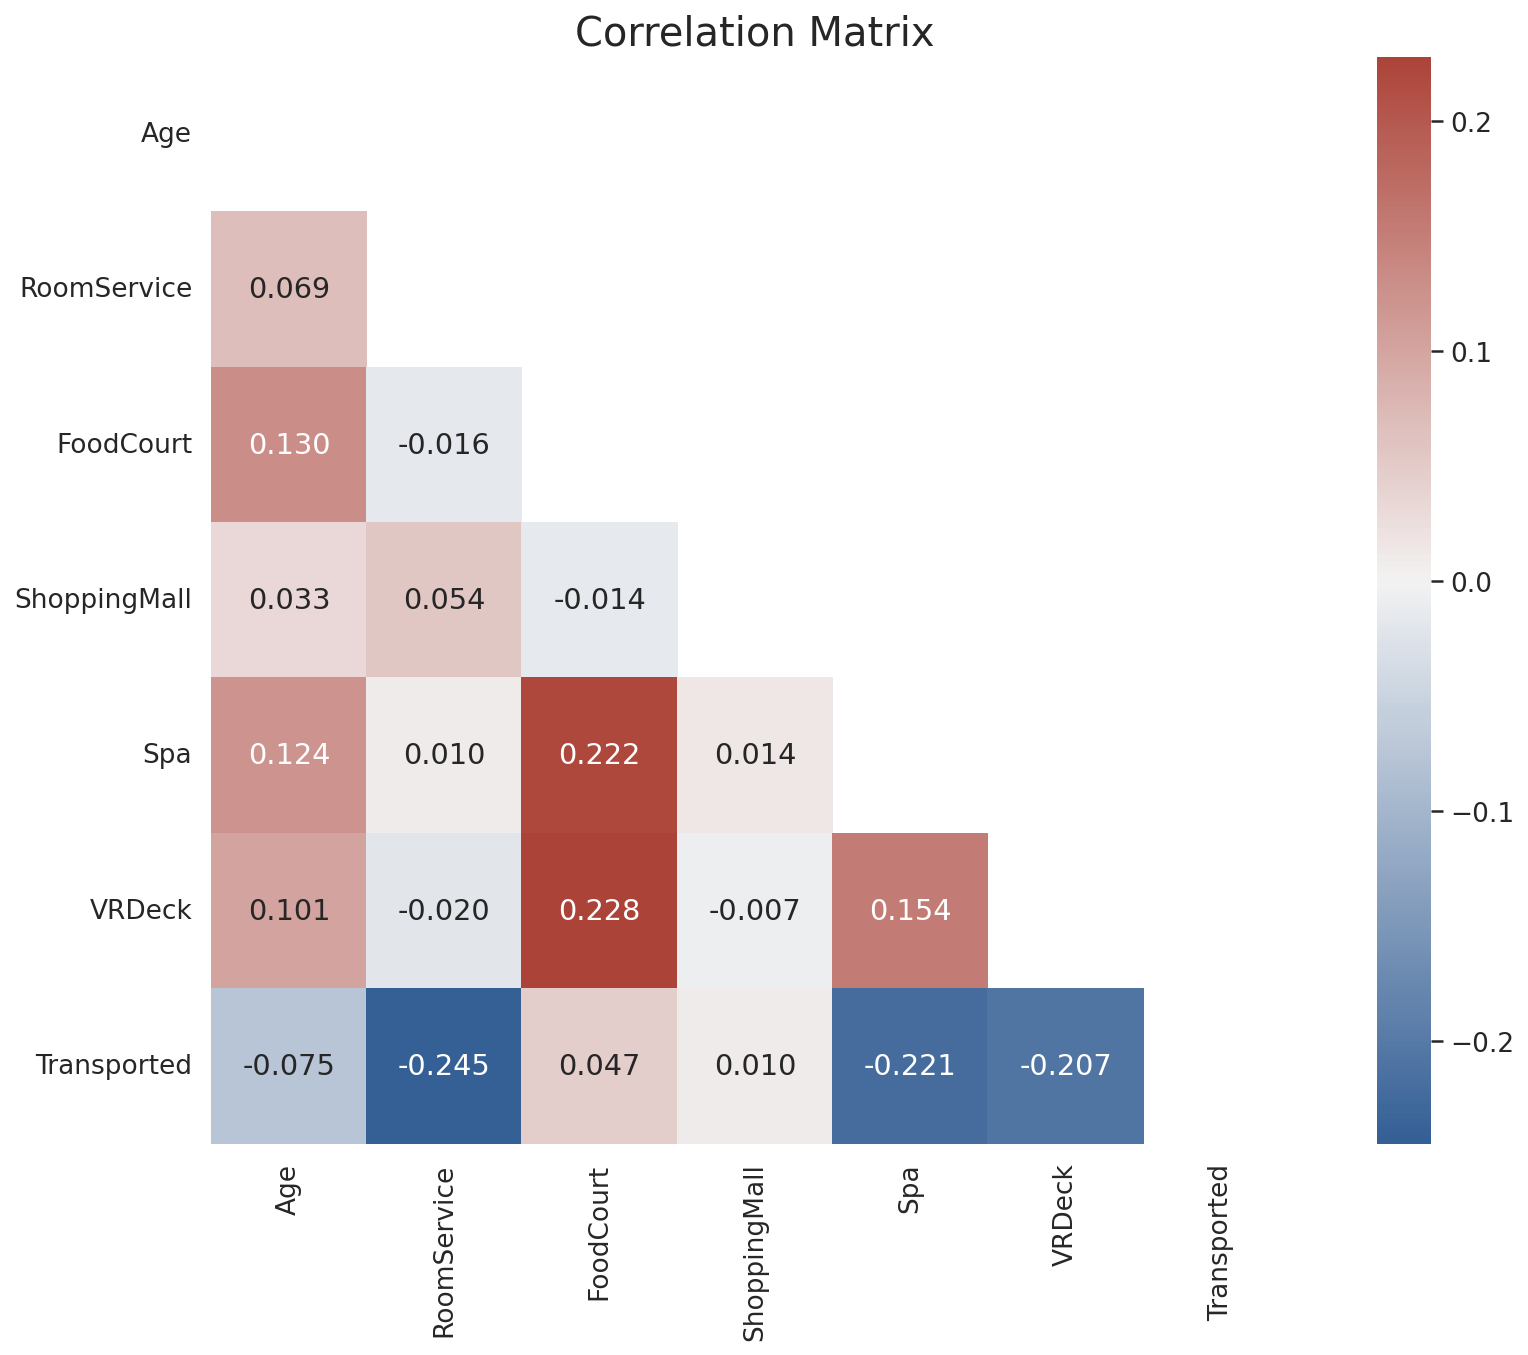

In [34]:
plt.figure(figsize=(14,10))
matrix = df_train.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.3f', square=True, cmap=cmap)
plt.title('Correlation Matrix',fontsize = 20)
plt.savefig('Correlation Matrix.png')

💡 **Insight**
* Age is not highly correlated with any feature therefore it is a significant feature.
* RoomService is slightly correlated to Shopping Mall (check if good to put both)
*  Goodcourt is correlated with SPA and VRDeck.

## 2.3. Target Variable

In [ ]:
#df_train[TARGET].value_counts().plot.pie()

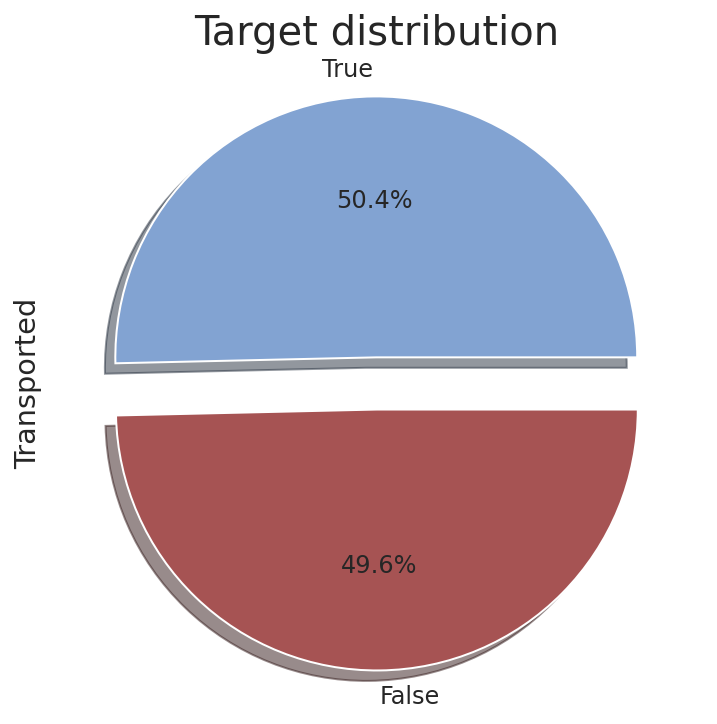

In [48]:
plt.figure(figsize=(6,6))
colors = ['#82A3D2','#A65353']
df_train[TARGET].value_counts().plot.pie(explode=[0.1,0.1], 
                                            autopct='%1.1f%%',colors = colors,
                                             shadow=True, 
                                             textprops={'fontsize':12}).set_title("Target distribution",fontsize=20)
plt.savefig('Target Distribution.png')

💡**Insights**
* The target variable is highly balanced, so we can use the `accuracy`as a valid metric and do not have to consider techniques like under/over-sampling.

## 2.4. Categorical Variables

In [49]:
categ_cols =  [col for col in FEATURES if df_train[col].nunique() < 25 and col not in text_cols]
categ_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [154]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = ['#82A3D2','#A65353','#DD7878', '#7898DD', '#F6B8C3', '#DDEEF9',
              CB91_Purple, CB91_Violet]
colors = ['#82A3D2','#A65353']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

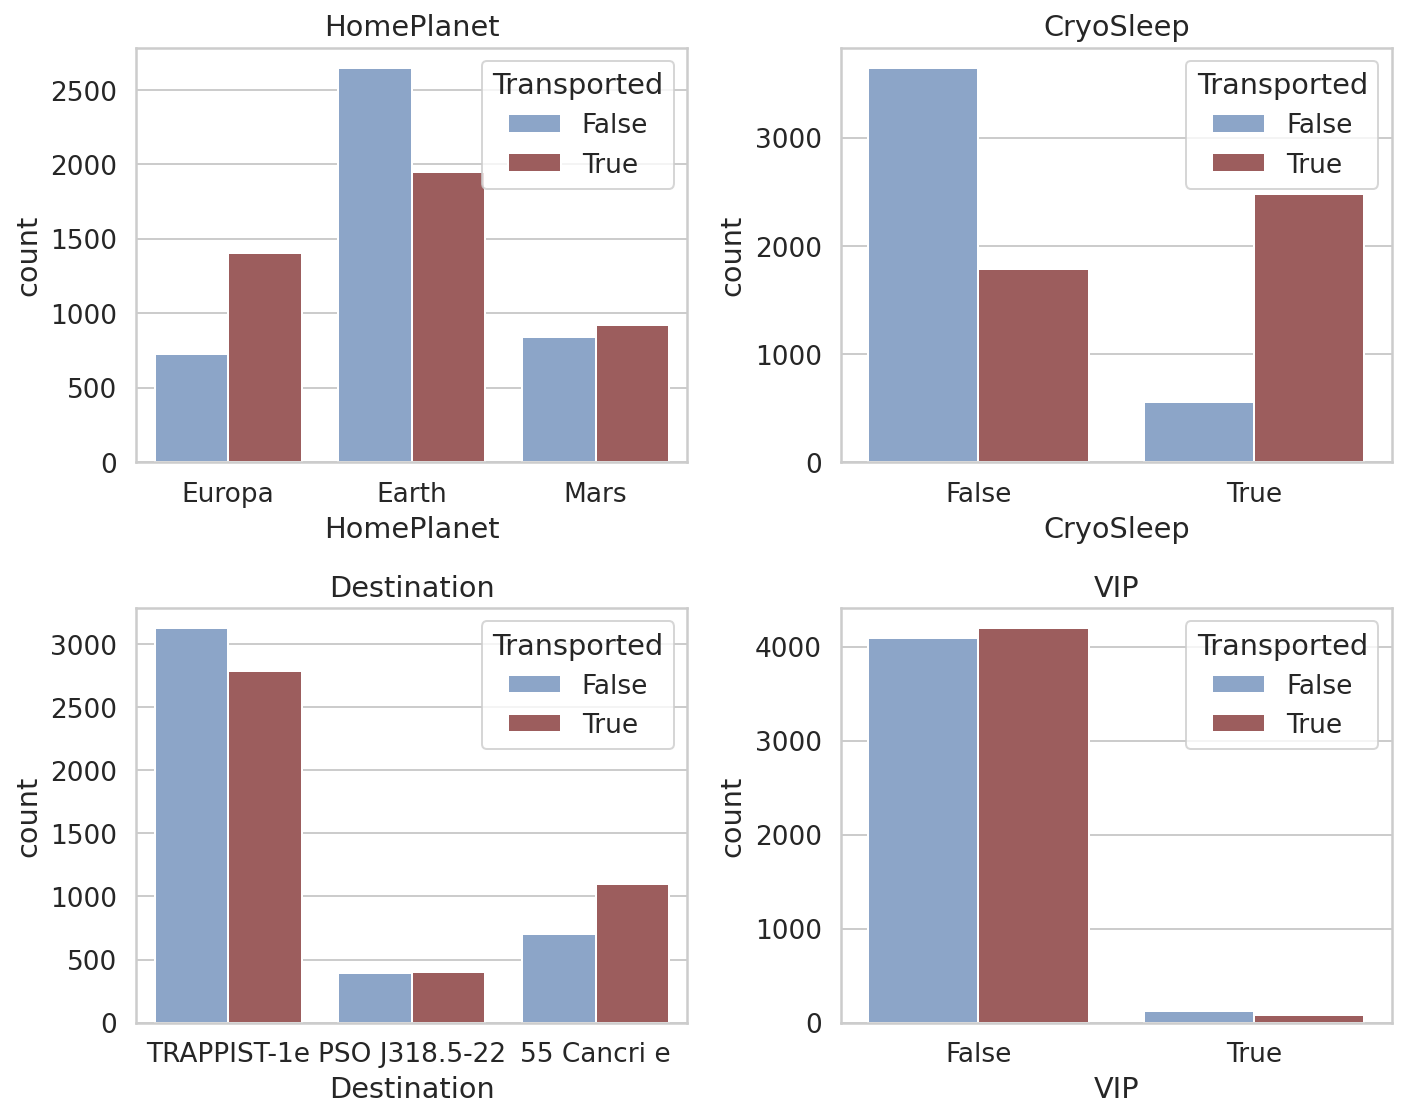

<Figure size 1296x432 with 0 Axes>

In [55]:
# Plot categorical features
fig=plt.figure(figsize=(10,8))

for i, var_name in enumerate(categ_cols):
    ax=fig.add_subplot(2,2,i+1)
    sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()
plt.savefig('Categorical.png')

 💡 **Insights** 
* There appears to be a greater likelihood of passengers that departed from (or from) Europe and Mars than passengers that departed from (or from) Earth.
* CyroSleep seems to be a very useful feature as it is highly positively correlated with Transported - i.e. those that were confined in their cabines were more likely to be transported.
* Based on the plot, the planet where the passenger was debarking to/going, we cansee that the destination `TRAPPIST-1e` has a negative correlation with Transported- therefore less likely to be transported. On the other hand, the other two destinations exhibit a positive corelation with passengers, being `55 Cancri e`the strongest one.
* Given that the target split is essentially equal, VIP does not seem to be a beneficial feature. In essence, it is false that VIP passengers have a higher chance of being transported.



## 2.5. Text Columns

In [56]:
text_cols = ['Cabin','Name','PassengerId']

In [57]:
df_train.reset_index()[text_cols].head()

Cabin               Name PassengerId
0  B/0/P    Maham Ofracculy     0001_01
1  F/0/S       Juanna Vines     0002_01
2  A/0/S      Altark Susent     0003_01
3  A/0/S       Solam Susent     0003_02
4  F/1/S  Willy Santantines     0004_01

 💡 **Insights**
* The PassengerId feature allows us to extract the group and group size.
* The cabin function allows us to extract the deck, number, and side. 
* To identify families, we might extract the surname from the name feature.


### 2.5.1. Split `Cabin` into `CabinDeck`, `CabinNumber`and `CabinSide`

* Cabin is written as deck/num/side, where side might be P for Port or S for Starboard.
* The cabin function allows us to extract the deck, number, and side. 

In [58]:
def split_cabin(data):
  # Replace NaN's with outliers for now (so we can split feature)
  data['Cabin'].fillna('Z/9999/Z', inplace=True)
  data['CabinDeck'] = data['Cabin'].apply(lambda x: x.split('/')[0])
  data['CabinNumber'] = data['Cabin'].apply(lambda x: x.split('/')[1]).astype('float').astype('Int64')
  #data['CabinNumber'] = data['CabinNumber'].astype(int)
  data['CabinSide'] = data['Cabin'].apply(lambda x: x.split('/')[2])

  

  # Put Nan's back in (we will fill these later)
  data.loc[data['Cabin']=='Z/9999/Z', 'Cabin']=np.nan
  data.loc[data['CabinDeck']=='Z', 'CabinDeck']=np.nan
  data.loc[data['CabinNumber']==9999, 'CabinNumber']=np.nan
  data.loc[data['CabinSide']=='Z', 'CabinSide']=np.nan
  

  # Drop Cabin (we don't need it anymore)
  data.drop('Cabin', axis=1, inplace=True)
  return data


In [59]:
cabin_transformer = FunctionTransformer(split_cabin,validate=False)
df_train, df_test = read_data()
df_train = cabin_transformer.fit_transform(df_train)
df_train[['CabinSide','CabinDeck','CabinNumber']]

CabinSide CabinDeck  CabinNumber
PassengerId                                 
0001_01             P         B            0
0002_01             S         F            0
0003_01             S         A            0
0003_02             S         A            0
0004_01             S         F            1
...               ...       ...          ...
9276_01             P         A           98
9278_01             S         G         1499
9279_01             S         G         1500
9280_01             S         E          608
9280_02             S         E          608

[8693 rows x 3 columns]

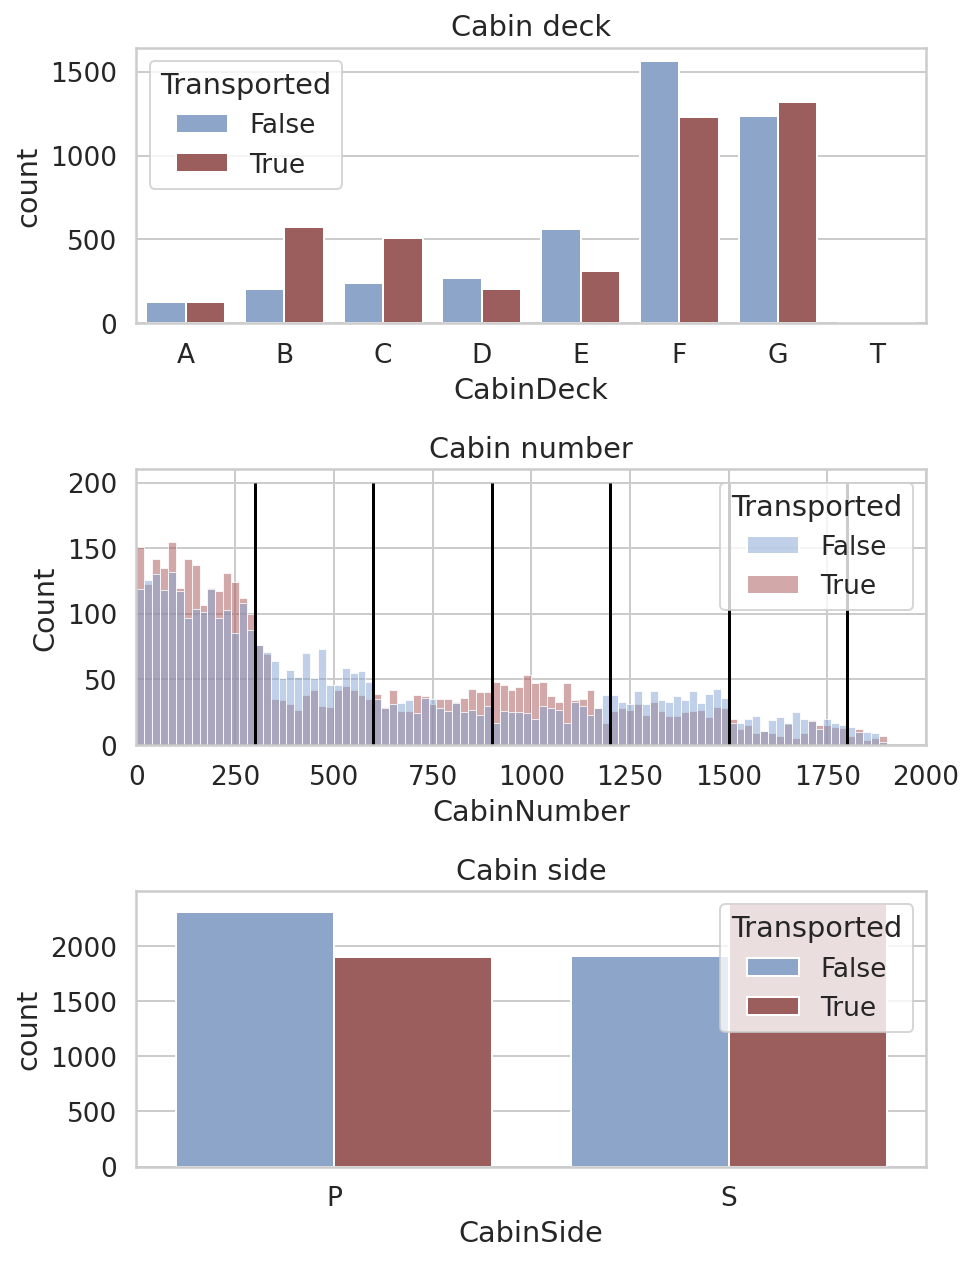

In [60]:
# Plot distribution of new features
fig=plt.figure(figsize=(7,9))
plt.subplot(3,1,1)
sns.countplot(data=df_train, x='CabinDeck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=df_train, x='CabinNumber', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=df_train, x='CabinSide', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()
plt.savefig('Cabin.png')

💡 **Insights**
* `CabinNumber`appears to be grouped in chunks of around 250 cabins, we could compress this feature into one which indicates which chunk the passenger is in. 
* `CabinDeck` *T* is an outlier with only 5 samples.

### 2.5.2 Add `cabin_region`

In [61]:
 def add_cabin_region(data): 
  data['Cabin_region1']=(data['CabinNumber']<300).astype(np.float).astype("Int32")   # one-hot encoding
  data['Cabin_region2']=((data['CabinNumber']>=300) & (data['CabinNumber']<600)).astype(np.float).astype("Int32")
  data['Cabin_region3']=((data['CabinNumber']>=600) & (data['CabinNumber']<900)).astype(np.float).astype("Int32")
  data['Cabin_region4']=((data['CabinNumber']>=900) & (data['CabinNumber']<1200)).astype(np.float).astype("Int32")
  data['Cabin_region5']=((data['CabinNumber']>=1200) & (data['CabinNumber']<1500)).astype(np.float).astype("Int32")
  data['Cabin_region6']=((data['CabinNumber']>=1500) & (data['CabinNumber']<1800)).astype(np.float).astype("Int32")
  data['Cabin_region7']=(data['CabinNumber']>=1800).astype(np.float).astype("Int32")
  return data

In [62]:
cabin_region_transformer = FunctionTransformer(add_cabin_region,validate=False)

In [63]:
df_train = cabin_region_transformer.fit_transform(df_train)
cabin_filter = [col for col in df_train if col.startswith('Cabin')]
df_train[cabin_filter]
#df_train[['Cabin', 'Cabin_deck', 'Cabin_num', 'Cabin_side']]

CabinDeck  CabinNumber CabinSide  Cabin_region1  Cabin_region2  \
PassengerId                                                                  
0001_01             B            0         P              1              0   
0002_01             F            0         S              1              0   
0003_01             A            0         S              1              0   
0003_02             A            0         S              1              0   
0004_01             F            1         S              1              0   
...               ...          ...       ...            ...            ...   
9276_01             A           98         P              1              0   
9278_01             G         1499         S              0              0   
9279_01             G         1500         S              0              0   
9280_01             E          608         S              0              0   
9280_02             E          608         S              0              0   

             Cabin_region3  Cabin_region4  Cabin_region5  Cabin_region6  \
PassengerId                                                               
0001_01                  0              0              0              0   
0002_01                  0              0              0              0   
0003_01                  0              0              0              0   
0003_02                  0              0              0              0   
0004_01                  0              0              0              0   
...                    ...            ...            ...            ...   
9276_01                  0              0              0              0   
9278_01                  0              0              1              0   
9279_01                  0              0              0              1   
9280_01                  1              0              0              0   
9280_02                  1              0              0              0   

             Cabin_region7  
PassengerId                 
0001_01                  0  
0002_01                  0  
0003_01                  0  
0003_02                  0  
0004_01                  0  
...                    ...  
9276_01                  0  
9278_01                  0  
9279_01                  0  
9280_01                  0  
9280_02                  0  

[8693 rows x 10 columns]

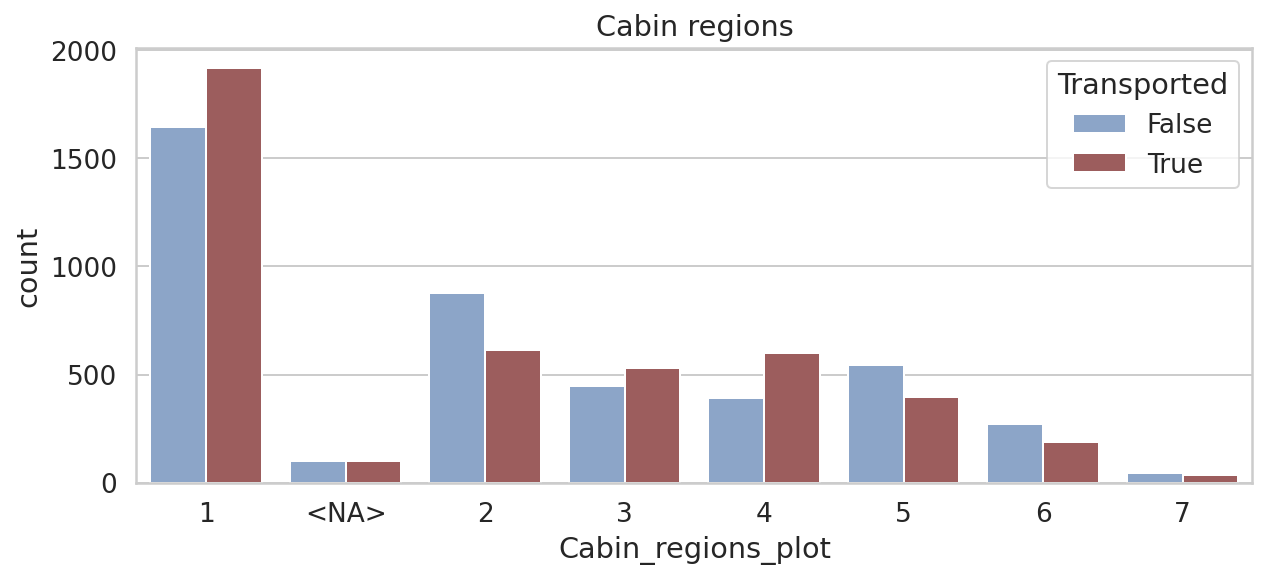

In [64]:
# Plot distribution of new features
plt.figure(figsize=(10,4))
df_train['Cabin_regions_plot']=(df_train['Cabin_region1']+2*df_train['Cabin_region2']+3*df_train['Cabin_region3']+4*df_train['Cabin_region4']+5*df_train['Cabin_region5']+6*df_train['Cabin_region6']+7*df_train['Cabin_region7']).astype('str')
sns.countplot(data=df_train, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
df_train.drop('Cabin_regions_plot', axis=1, inplace=True)
plt.savefig('CabinRegion.png')

### 2.5.3 Split `PassengerID`

PassengerId has the format gggg pp, where gggg represents the group the passenger is traveling with and pp represents their position inside the group. 

In [65]:
def split_passenger(data, inplace=True):
    """Split the feature `PassengerId` into `Group` and `Number`
    """
    df = data if inplace else data.copy()

    df['PassengerGroup'] = df.index.map(lambda x: x[0:4]).astype(int)
    df['PassengerNumber'] = df.index.map(lambda x: x[5:7]).map(np.int16)
    df['PassengerNumber'] = df['PassengerNumber'].astype(int)
    
    return df

In [66]:
split_passenger_transformer = FunctionTransformer(split_passenger,validate=False)
df_train = split_passenger_transformer.fit_transform(df_train)

In [67]:
df_train[['PassengerGroup', 'PassengerNumber']].head()

PassengerGroup  PassengerNumber
PassengerId                                 
0001_01                   1                1
0002_01                   2                1
0003_01                   3                1
0003_02                   3                2
0004_01                   4                1

💡 **Insights**
* The PassengerId feature allows us to extract the group and group size.
* The cabin function allows us to extract the deck, number, and side. 
* To identify families, we might extract the surname from the name feature.

In [ ]:
#df_train[['PassengerGroup', 'PassengerNumber']].dtypes

### 2.5.4. Add `GroupSize` from `PassengerGroup`

In [68]:
def add_group_size(data):
    data.drop(['GroupSize'], axis=1, inplace=True, errors='ignore')
    
    df = data[['PassengerGroup', 'PassengerNumber']].groupby(by='PassengerGroup').max()
    df.columns = ['GroupSize']

    df = data.reset_index().merge(df, 
        how='left', 
        left_on='PassengerGroup', 
        right_on='PassengerGroup')

    return df.set_index(INDEX)


In [69]:
add_group_size_transformer = FunctionTransformer(add_group_size)

In [70]:
df_train = add_group_size(df_train)
df_train[['PassengerGroup', 'GroupSize']].head()

PassengerGroup  GroupSize
PassengerId                           
0001_01                   1          1
0002_01                   2          1
0003_01                   3          2
0003_02                   3          2
0004_01                   4          1

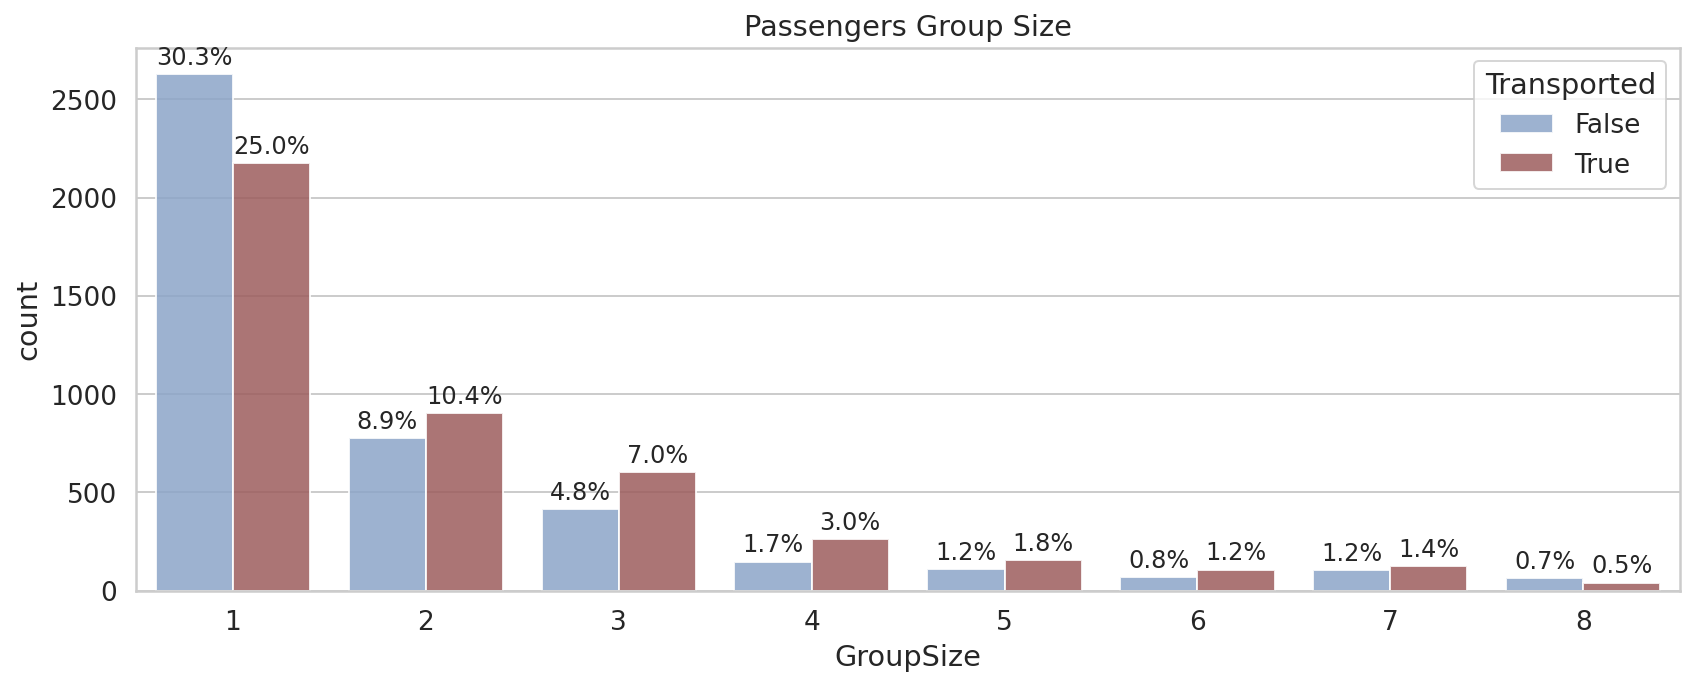

<Figure size 1296x432 with 0 Axes>

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(data=df_train, x='GroupSize',hue=TARGET,alpha=0.85,ax=ax)
bar_percent(ax, N=len(df_train), size=12)
ax.set_title('Passengers Group Size')
plt.tight_layout()
plt.show()
plt.savefig('PassengerGroupSize.png')

There is a problem with using the Group feature in our models because it has a large cardinality (6217). This would lead to an explosion in the number of dimensions with one-hot encoding. The size of a group is a useful feature. We can further compress the feature by tracking whether someone is travelling on their own or not. The data shows that groups of one are less likely to be transported than groups of more than one.

### 2.5.5. Add `Solo`Feature

In [72]:
def add_solo(data,inplace = True):
  df = data if inplace else data.copy()
  df['Solo']=(df['GroupSize']==1).astype(int)
  return data

In [73]:
solo_transformer = FunctionTransformer(add_solo)
df_train = solo_transformer.fit_transform(df_train)

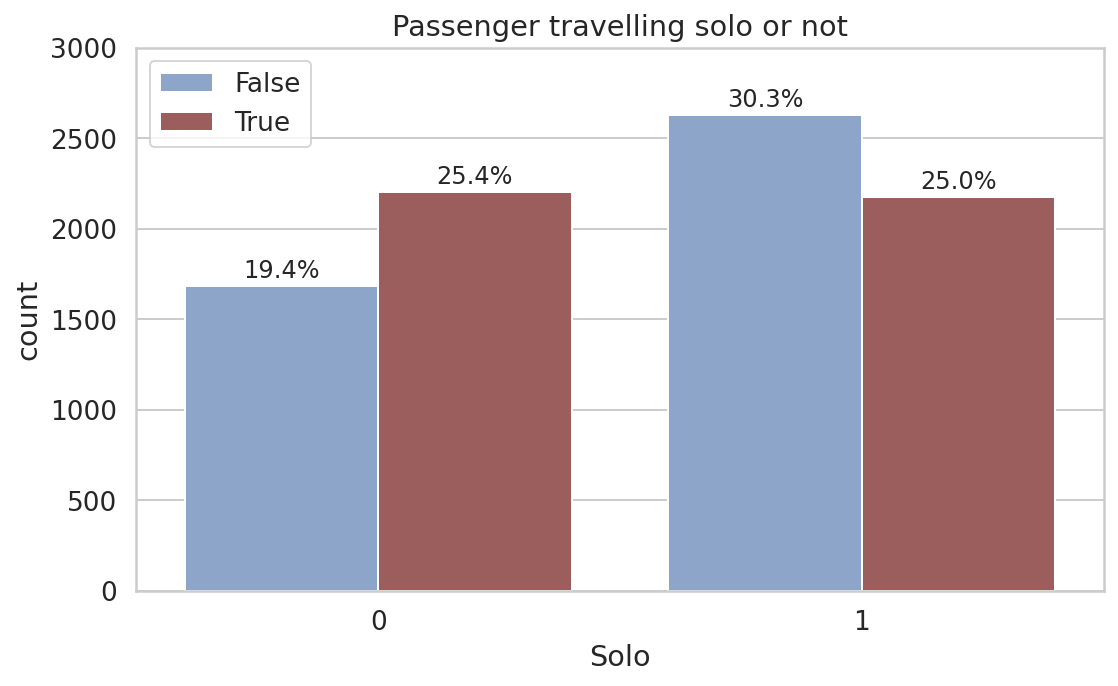

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.countplot(data=df_train, x='Solo', hue='Transported', ax = ax)
bar_percent(ax, N=len(df_train), size=12)
ax.set_title('Passenger travelling solo or not')
plt.ylim([0,3000])
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig('Solo.png')

### 2.5.6 Split `Name`Feature

To identify families, we might extract the surname from the name feature.

In [75]:
def split_name(data):
    data['Name'].fillna('Unknown Unknown', inplace=True)
    data['Firstname'] = data['Name'].str.split().str[0]
    data['Surname'] = data['Name'].str.split().str[-1]

    data.loc[data['Name']=='Unknown Unknown','Name']=np.nan
    #data.loc[data['Firstname']=='Unknown','Firstname']=np.nan
    #data.loc[data['Surname']=='Unknown','Surname']=np.nan
    
    
    return data

name_transformer = FunctionTransformer(split_name)

In [76]:
df_train = name_transformer.fit_transform(df_train)
df_train[['Name', 'Firstname', 'Surname']].head()

Name Firstname      Surname
PassengerId                                          
0001_01        Maham Ofracculy     Maham    Ofracculy
0002_01           Juanna Vines    Juanna        Vines
0003_01          Altark Susent    Altark       Susent
0003_02           Solam Susent     Solam       Susent
0004_01      Willy Santantines     Willy  Santantines

### 2.5.7. Add `Family Size`Feature from Surname

In [77]:
def add_family_size(data):
  data['FamilySize']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

  data.loc[data['Firstname']=='Unknown','Firstname']=np.nan
  data.loc[data['Surname']=='Unknown','Surname']=np.nan
  data.loc[data['FamilySize']>100,'FamilySize'] = np.nan

  return data


In [78]:
family_size_transformer = FunctionTransformer(add_family_size)
df_train = family_size_transformer.fit_transform(df_train)

In [79]:
df_train[['Surname','FamilySize']].sort_values(by = 'FamilySize',ascending = False)

Surname  FamilySize
PassengerId                       
2940_01      Casonston        18.0
3995_03      Casonston        18.0
2650_01      Casonston        18.0
2561_01      Casonston        18.0
5679_01      Casonston        18.0
...                ...         ...
9205_02            NaN         NaN
9208_01            NaN         NaN
9218_01            NaN         NaN
9230_01            NaN         NaN
9246_01            NaN         NaN

[8693 rows x 2 columns]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.countplot(data=df_train, x='Solo', hue='Transported', ax = ax)
bar_percent(ax, N=len(df_train), size=12)
ax.set_title('Passenger travelling solo or not')
plt.ylim([0,3000])
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig('Solo.png')

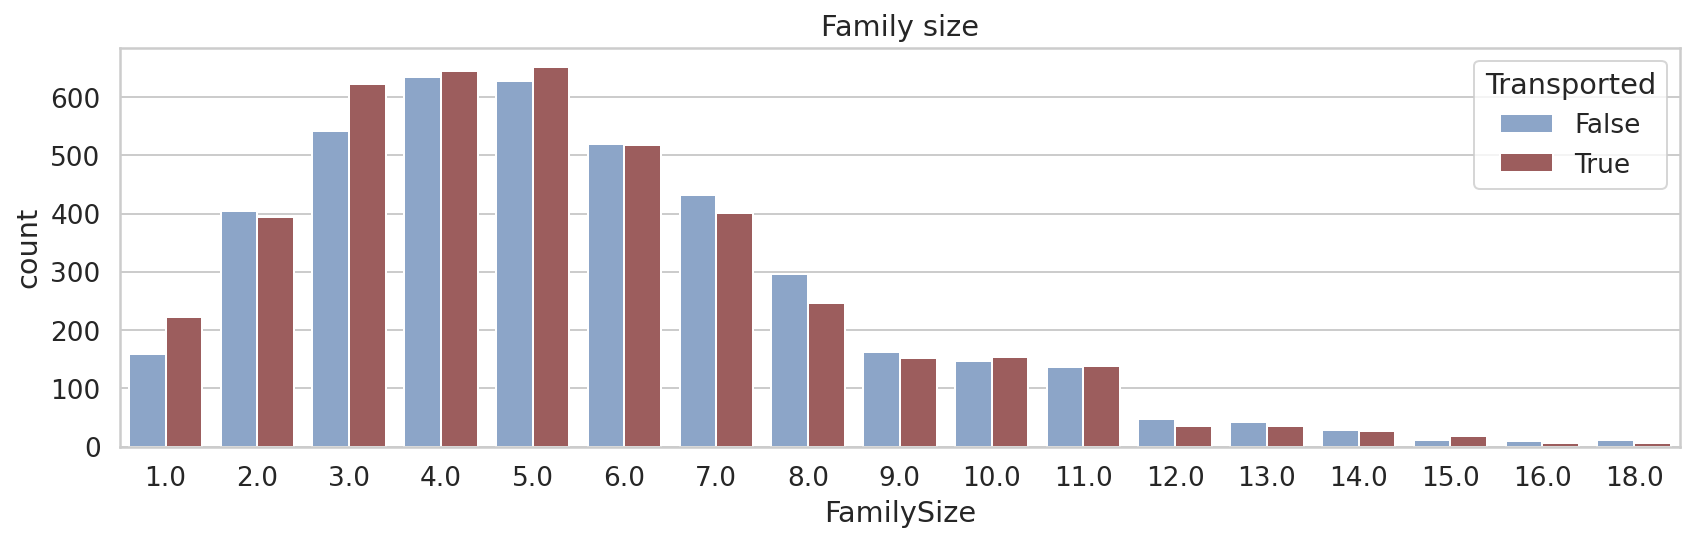

In [89]:
# New feature distribution
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

sns.countplot(data=df_train, x='FamilySize', hue='Transported', ax = ax)
#bar_percent(ax, N=len(df_train), size=12)
ax.set_title('Family size')
plt.tight_layout()
plt.savefig('FamilySize.png')

## 2.6. Numerical Columns

### 2.6.1.`TotalExpenditure` and  `NoExpenditure`

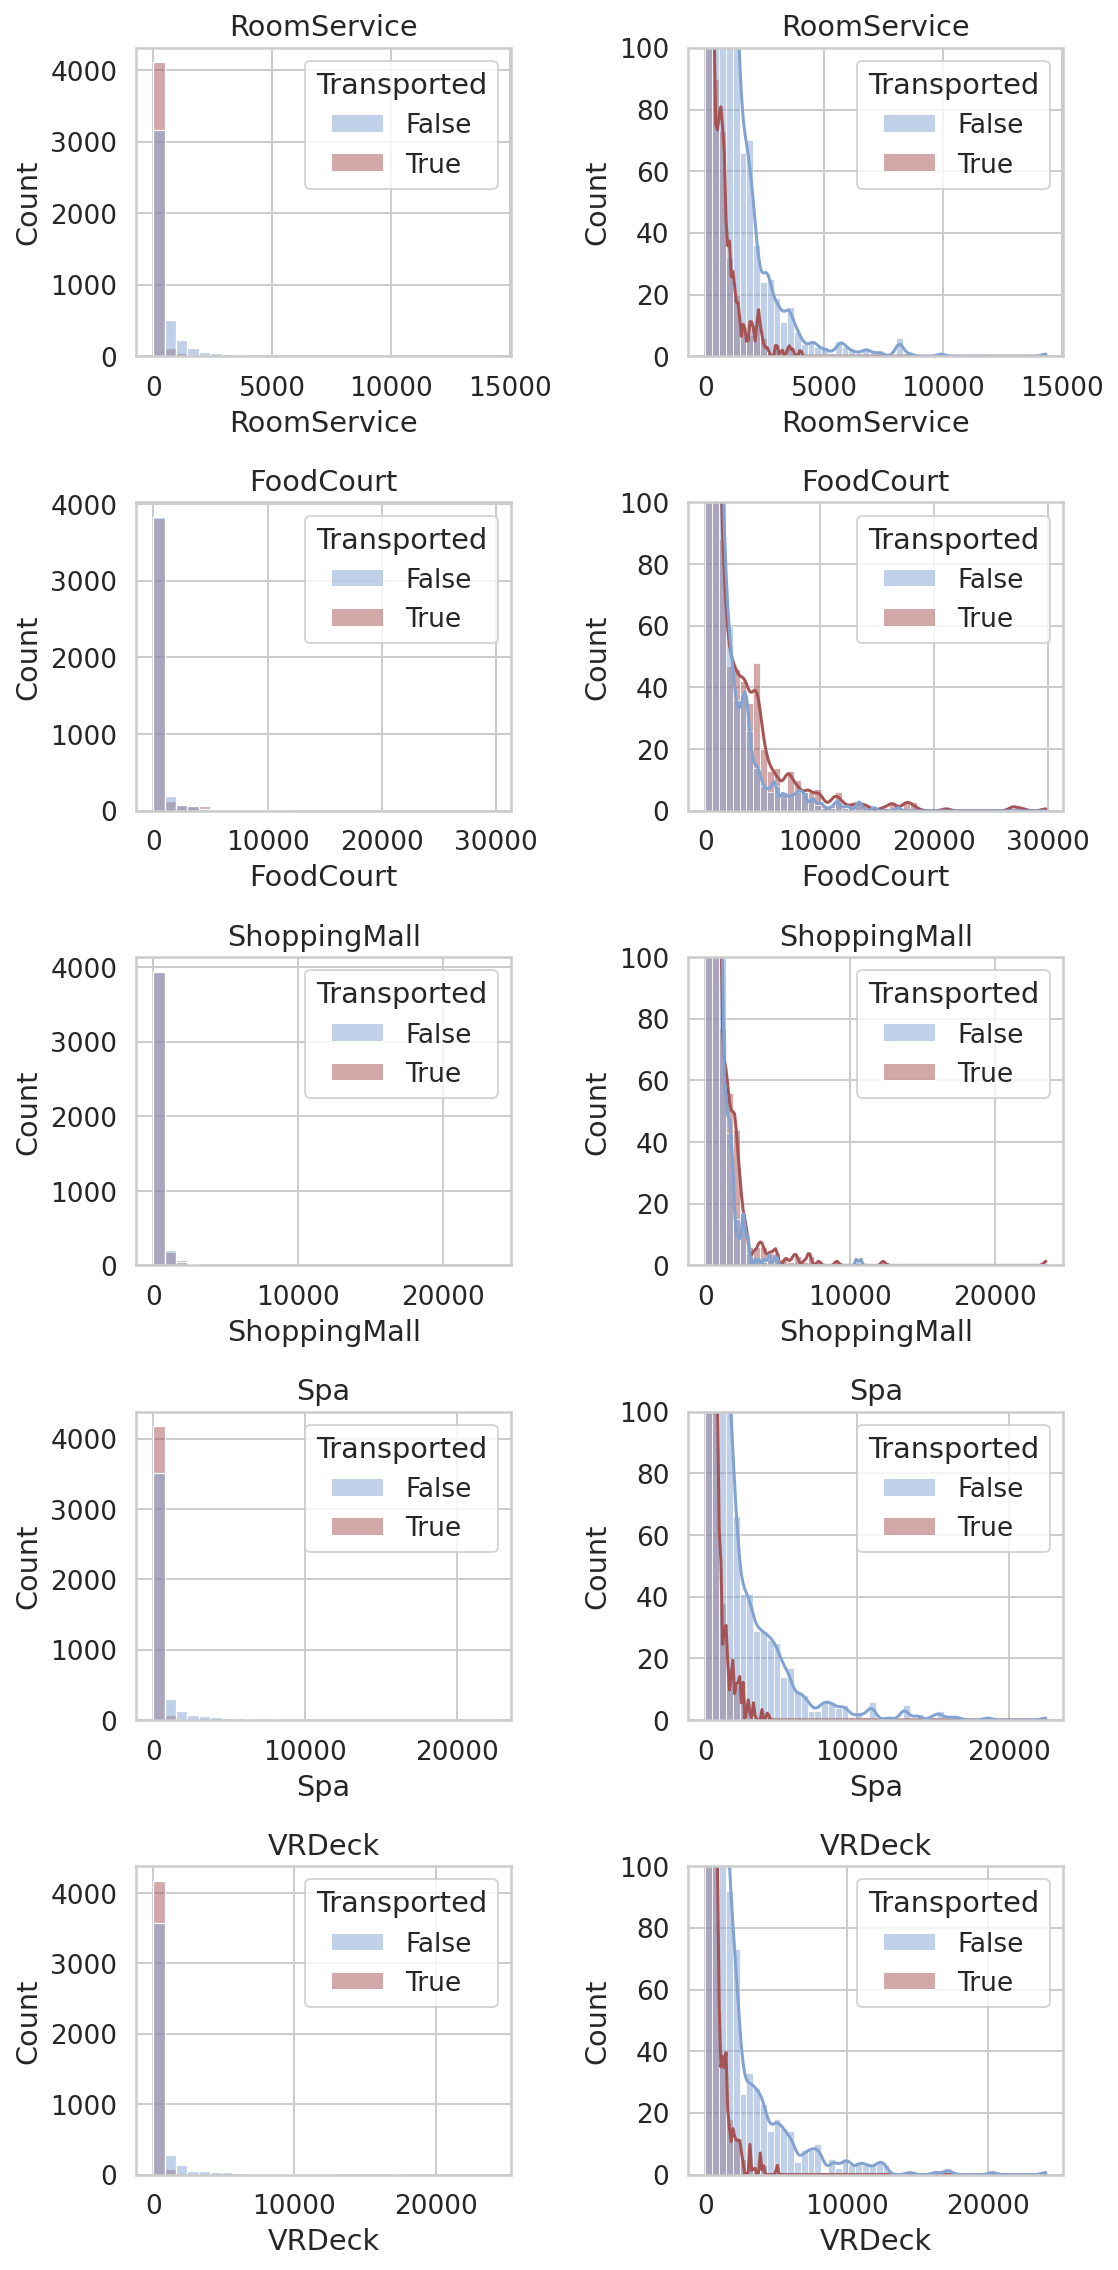

<Figure size 1296x432 with 0 Axes>

In [91]:
# Expenditure features
expenditure_cols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


fig=plt.figure(figsize=(8,16))
for i, var in enumerate(expenditure_cols):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df_train, x=var, axes=ax, bins=30, kde=False, hue=TARGET)
    ax.set_title(var)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df_train, x=var, axes=ax, bins=50, kde=True, hue=TARGET)
    plt.ylim([0,100])
    ax.set_title(var)
plt.tight_layout()  
plt.show()
plt.savefig('NumericalDistribution.png')

💡**Insights**

* From the plots on the left we can see that the majority of the people didn't spend any money.
* From the plots on the right, we can see that the distribution of spending decays exponentially.
* There are not many outliers.
* Those that were transported tended to spend less.
RoomService, Spa, and VRDeck (luxury expenditures) are distributed differently than FoodCourt and ShoppingMall (basic expenditures)
* Create new feature that monitors the overall cost of all five facilities.
* Create new feature that monitors **luxury expenditures** (RoomService, SPA and VRDeck) and **basic expenditures** (FoodCourt, ShoppingMall)
* Create binary feature to indicate whether or not the individual has spent anything.
* To decrease skew, use log transform.

In [92]:
def add_totalexpenditure(data):
  expenditure_cols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  data['Total_Expenditure'] = data[expenditure_cols].sum(axis = 1)
  data['No_Expenditure']=(data['Total_Expenditure']==0).astype(int)
  return data 

In [93]:
total_expenditure_transformer = FunctionTransformer(add_totalexpenditure)

In [94]:

df_train = total_expenditure_transformer.fit_transform(df_train)
df_train[['Total_Expenditure', 'No_Expenditure']].head()

Total_Expenditure  No_Expenditure
PassengerId                                   
0001_01                    0.0               1
0002_01                  736.0               0
0003_01                10383.0               0
0003_02                 5176.0               0
0004_01                 1091.0               0

### 2.6.2. `Luxury_Expenditure`and `BasicExpenditure`

In [95]:
def add_luxury_basic_expenditure(data):
  expenditure_cols=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  data['Luxury_Expenditure'] = data[['RoomService','Spa','VRDeck']].sum(axis = 1)
  data['Basic_Expenditure'] = data[['FoodCourt','ShoppingMall']].sum(axis = 1)
  return data 

In [96]:
basic_luxury_transformer = FunctionTransformer(add_luxury_basic_expenditure)
df_train = basic_luxury_transformer.fit_transform(df_train)
df_train[['Luxury_Expenditure', 'Basic_Expenditure']].head()

Luxury_Expenditure  Basic_Expenditure
PassengerId                                       
0001_01                     0.0                0.0
0002_01                   702.0               34.0
0003_01                  6807.0             3576.0
0003_02                  3522.0             1654.0
0004_01                   870.0              221.0

### 2.6.3. Age Binner

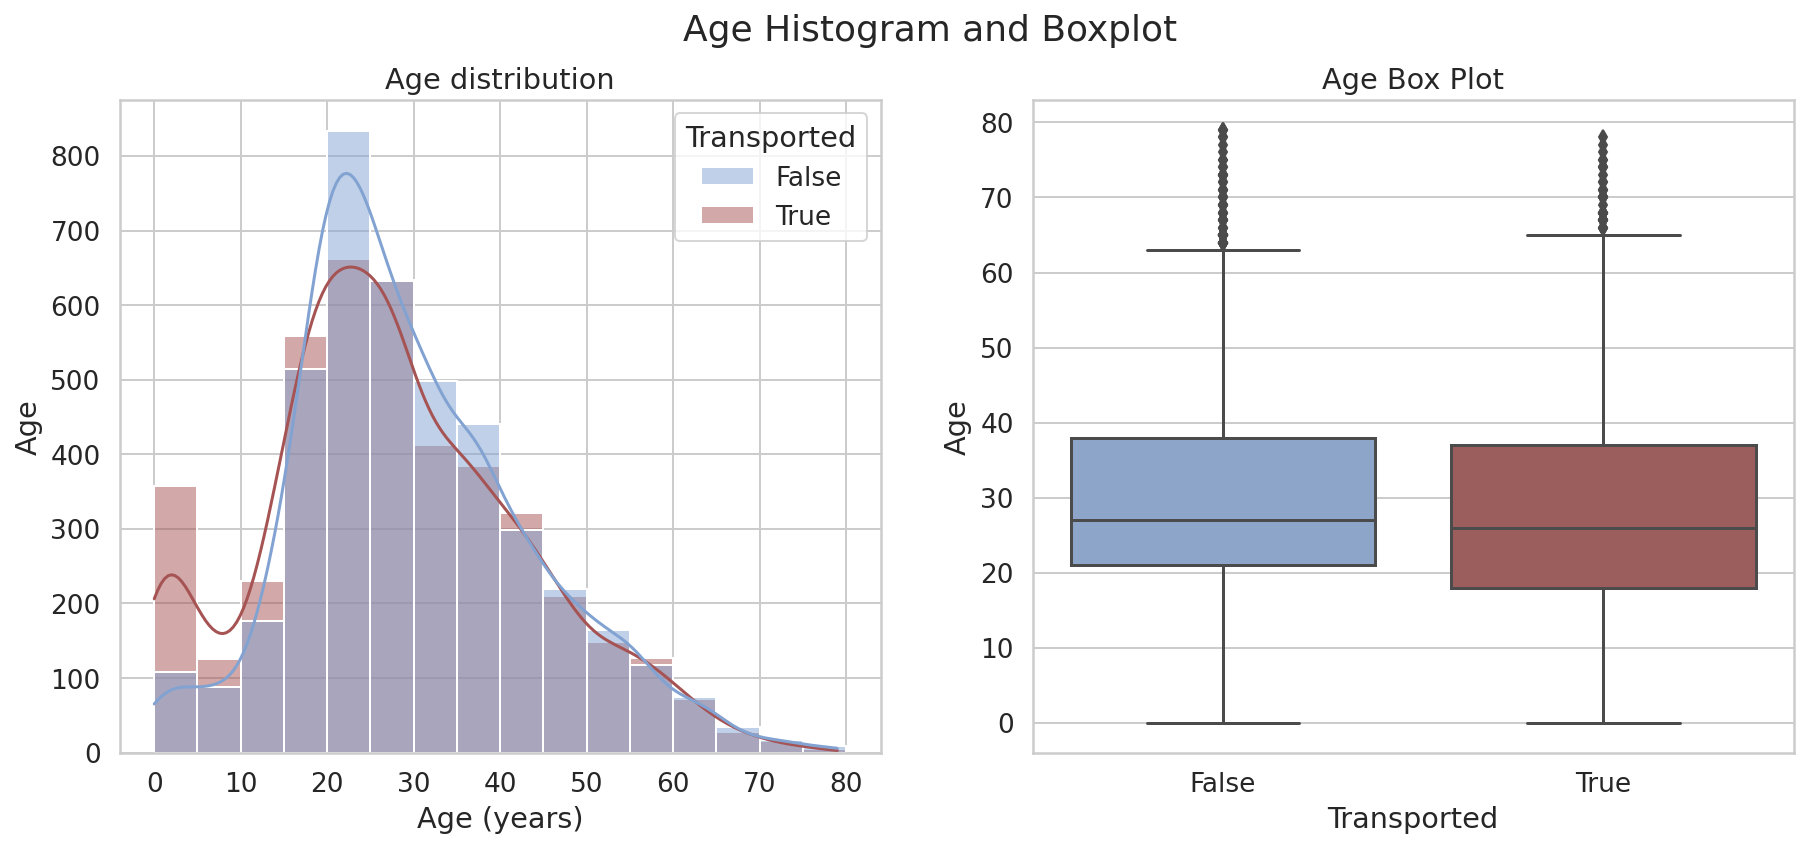

In [97]:
#plt.figure(figsize=(10,4))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Age Histogram and Boxplot', size=18)

sns.histplot(data=df_train, x='Age', hue=TARGET, binwidth=5, kde=True,ax =ax1,bins = 100)
ax1.set_title('Age distribution')
ax1.set_xlabel('Age (years)')

sns.boxplot(data = df_train, x = TARGET,y = 'Age',ax = ax2)
ax2.set_title('Age Box Plot')
ax2.set_xlabel('Transported')
ax1.set_ylabel('Age')
plt.savefig('Age.png')

💡**Insights**
* We can see that the youngest are the most likely of being transported.
*  Those in their 20s are the least likely of being transported.
* Passengers over 40 were about equally likely to be trnasported than not.

In [98]:
def discretization_age(data):
    bins = [-np.inf, 2, 13, 21, 60, np.inf]
    labels = ['Baby', 'Kid', 'Teen', 'Adult', 'Senior']

    age_transformer = FunctionTransformer(
        pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
    )
    data['AgeClass'] = age_transformer.fit_transform(data['Age'])
    return data
  

In [99]:
age_transformer = FunctionTransformer(discretization_age)
df_train = age_transformer.fit_transform(df_train)
df_train[['Age', 'AgeClass']].head()

Age AgeClass
PassengerId               
0001_01      39.0    Adult
0002_01      24.0    Adult
0003_01      58.0    Adult
0003_02      33.0    Adult
0004_01      16.0     Teen

In [100]:
def plot_count(data, feature, target=TARGET, ax=None, percent=True):
    if ax is None:
        ax = plt.gca()

    sns.countplot(
        data=data, 
        x=feature,
        hue=target,
        #palette='rocket', 
        alpha=0.75,
        ax=ax)
    
    if percent:
        bar_percent(ax, N=len(data))    
        
    ax.set_title(f'Count {feature}')

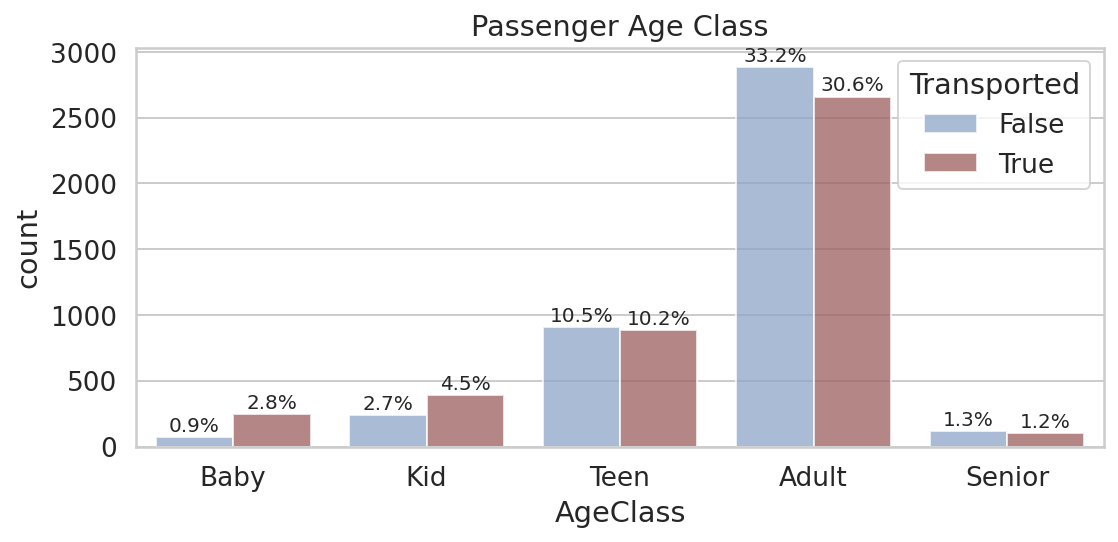

<Figure size 1296x432 with 0 Axes>

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

plot_count(df_train, 'AgeClass', ax=ax)
ax.set_title('Passenger Age Class')
plt.tight_layout()
plt.show()
plt.savefig('PassengerClass.png')

## 2.7. Data Cleaning pipeline

In [102]:
data_cleaning_pipeline = make_pipeline(
    cabin_transformer,
    cabin_region_transformer,
    split_passenger_transformer,
    add_group_size_transformer,
    solo_transformer,
    name_transformer,
    family_size_transformer,
    total_expenditure_transformer,
    basic_luxury_transformer,
    age_transformer)

In [103]:
df_train, df_test = read_data()
df_train = data_cleaning_pipeline.fit_transform(df_train)
df_test = data_cleaning_pipeline.transform(df_test)

# 3. Missing Values

In [104]:
# Labels and features
y=df_train['Transported'].copy().astype(int)
X=df_train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, df_test], axis=0).reset_index(drop=False)

In [105]:
data.head()
print(data.shape)

(12970, 34)


In [106]:
na_cols=data.columns[data.isna().any()].tolist()

mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

Number_missing  Percentage_missing
HomePlanet                288                2.22
CryoSleep                 310                2.39
Destination               274                2.11
Age                       270                2.08
VIP                       296                2.28
RoomService               263                2.03
FoodCourt                 289                2.23
ShoppingMall              306                2.36
Spa                       284                2.19
VRDeck                    268                2.07
Name                      294                2.27
CabinDeck                 299                2.31
CabinNumber               299                2.31
CabinSide                 299                2.31
Cabin_region1             299                2.31
Cabin_region2             299                2.31
Cabin_region3             299                2.31
Cabin_region4             299                2.31
Cabin_region5             299                2.31
Cabin_region6             299                2.31
Cabin_region7             299                2.31
Firstname                 294                2.27
Surname                   294                2.27
FamilySize                200                1.54
AgeClass                  270                2.08

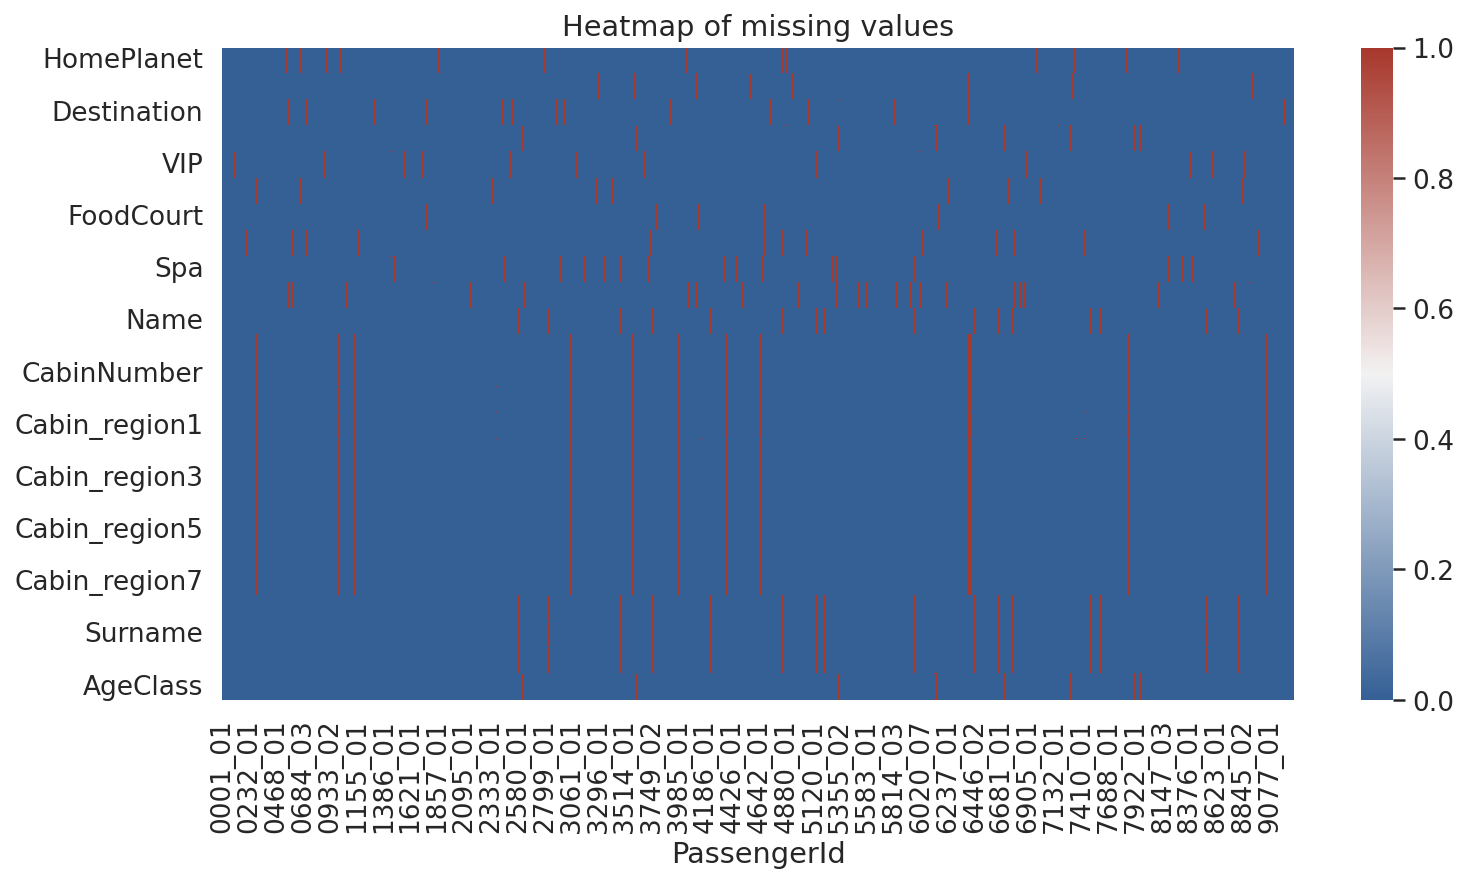

In [107]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df_train[na_cols].isna().T, cmap=cmap)
plt.title('Heatmap of missing values')
plt.savefig('HeatMapMissingValues.png')

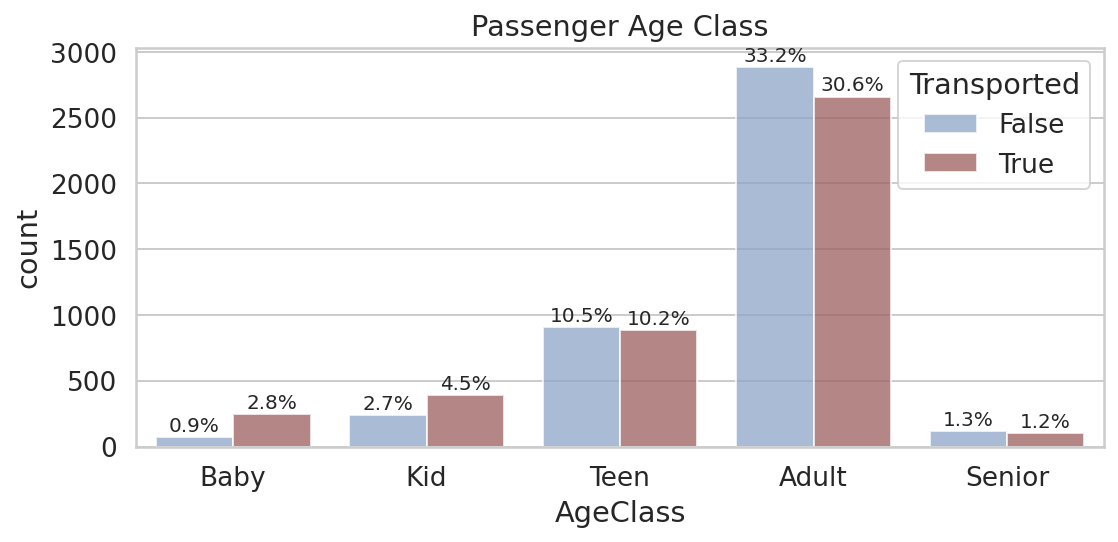

<Figure size 1296x432 with 0 Axes>

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

plot_count(df_train, 'AgeClass', ax=ax)
ax.set_title('Passenger Age Class')
plt.tight_layout()
plt.show()
plt.savefig('PassengerClass.png')

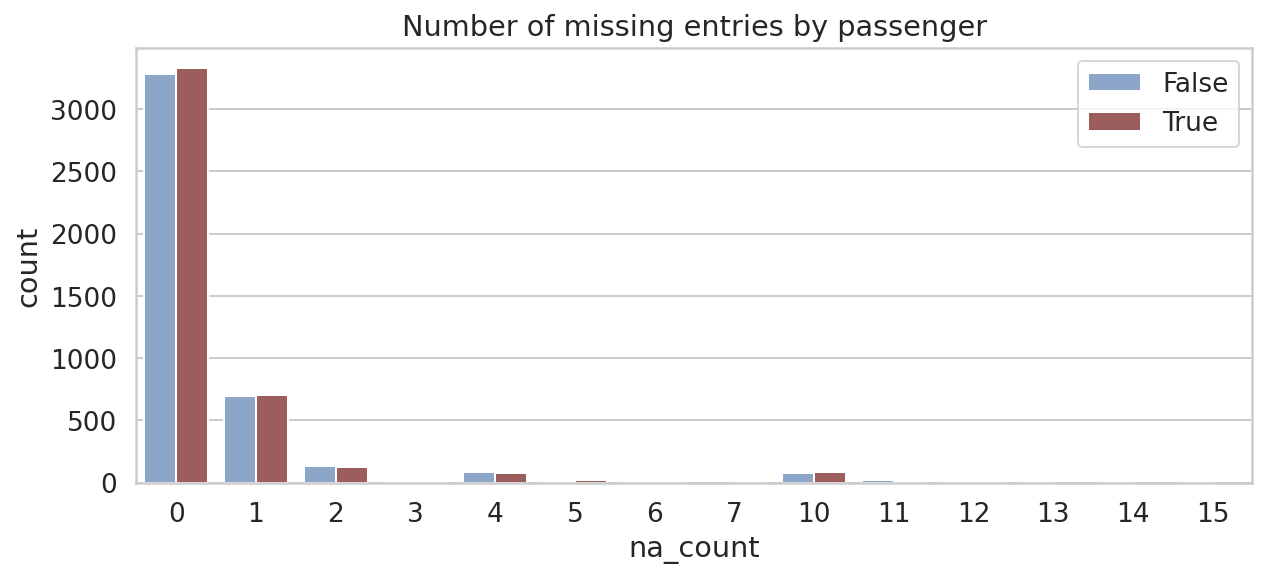

In [112]:
# Countplot of number of missing values by passenger
df_train['na_count']=df_train.isna().sum(axis=1)

plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
plt.legend(loc = 'upper right')
plt.savefig('MissingValuesperPassenger.png')
df_train.drop('na_count', axis=1, inplace=True)

## 3.1. Filling HomePlanet Missing Values

### 3.1.1. Group and HomePlanet

In [113]:
data.groupby(['PassengerGroup']).filter(lambda x: x['HomePlanet'].nunique()>1)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, CabinDeck, CabinNumber, CabinSide, Cabin_region1, Cabin_region2, Cabin_region3, Cabin_region4, Cabin_region5, Cabin_region6, Cabin_region7, PassengerGroup, PassengerNumber, GroupSize, Solo, Firstname, Surname, FamilySize, Total_Expenditure, No_Expenditure, Luxury_Expenditure, Basic_Expenditure, AgeClass]
Index: []

[0 rows x 34 columns]

In [114]:
GHP_ct = pd.crosstab(data.PassengerGroup, data.HomePlanet)
GHP_ct.head()

HomePlanet      Earth  Europa  Mars
PassengerGroup                     
1                   0       1     0
2                   1       0     0
3                   0       2     0
4                   1       0     0
5                   1       0     0

https://pbpython.com/pandas-crosstab.html

Text(0.5, 1.0, 'Number of unique home planets per group')

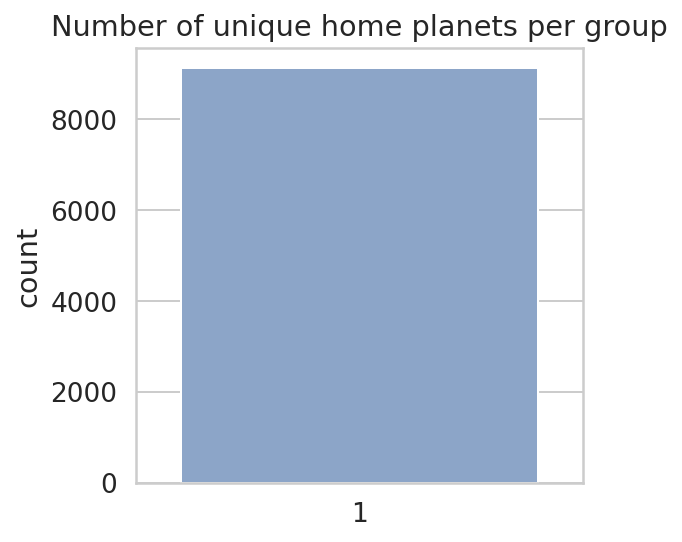

In [115]:
plt.figure(figsize=(4,4))
sns.countplot((GHP_ct>0).sum(axis = 1))
plt.title('Number of unique home planets per group')

💡**Insight**
* There are no group of passengers travelling with passengers from different planets, therefore I will impute missing values for `HomePlanet`within a known `PassengerGroup`, the `HomePlanet`of that `PassengerGroup`.

In [116]:
def impute_homeplanet_by_group(df: pd.DataFrame) -> pd.DataFrame:
    
    passenger_group_to_planet = df.groupby("PassengerGroup")["HomePlanet"].agg(pd.Series.mode).to_dict()

    keys_to_remove = []
    for key, value in passenger_group_to_planet.items():
        if type(value) != str:
            keys_to_remove.append(key)

    for key_to_remove in keys_to_remove:
        passenger_group_to_planet.pop(key_to_remove)

    for group_id, home_planet in passenger_group_to_planet.items():
        df.loc[df["PassengerGroup"] == group_id, "HomePlanet"] = home_planet
        
    return df

impute_homeplanet_by_group_transformer = FunctionTransformer(impute_homeplanet_by_group)

HP_bef=data['HomePlanet'].isna().sum()
data = impute_homeplanet_by_group_transformer.fit_transform(data)

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())


#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


### 3.1.2. HomePlanet and CabinDeck

In [117]:
#data.groupby(['CabinDeck']).filter(lambda x: x['HomePlanet'].nunique()>1)

In [118]:
CDHP_ct = pd.crosstab(data.CabinDeck, data.HomePlanet)
CDHP_ct.T.head()


CabinDeck     A     B     C    D    E     F     G   T
HomePlanet                                           
Earth         0     0     0    0  589  2437  3731   0
Europa      352  1137  1096  301  199     0     0  10
Mars          0     0     0  410  515  1742     0   0

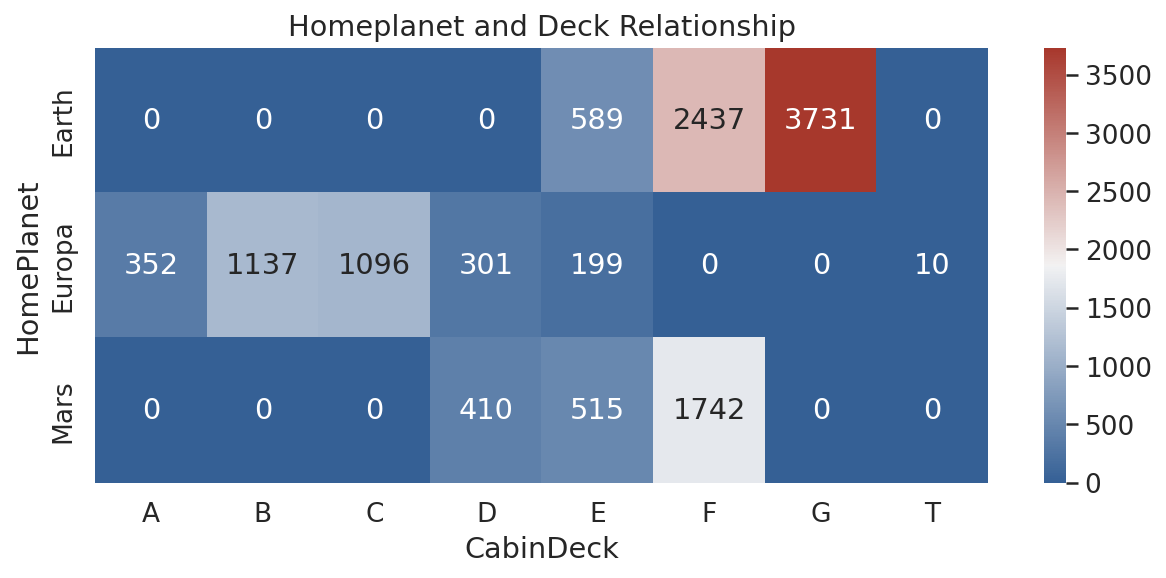

In [120]:
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_ct.T, annot = True, fmt = 'g', cmap = cmap)
plt.title('Homeplanet and Deck Relationship')
plt.savefig('Homeplanet and Deck Relationship.png')

💡**Insights**
* Passengers on decks A, B, C or T came from Europa.
* Passengers on deck G came from Earth.
* Passengers on decks D, E or F came from multiple planets.

In [121]:
def impute_homeplanet_by_cabindeck(data):
  data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'
  data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='G'), 'HomePlanet']='Earth'
  return data

impute_homeplanet_by_cabindeck_transformer = FunctionTransformer(impute_homeplanet_by_cabindeck)

HP_bef=data['HomePlanet'].isna().sum()
print('#HomePlanet missing values before:',HP_bef)

data = impute_homeplanet_by_cabindeck_transformer.fit_transform(data)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())




#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


### 3.1.3. Families and HomePlanet

In [122]:
data.groupby(['Surname']).filter(lambda x: x['HomePlanet'].nunique()>1)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, CabinDeck, CabinNumber, CabinSide, Cabin_region1, Cabin_region2, Cabin_region3, Cabin_region4, Cabin_region5, Cabin_region6, Cabin_region7, PassengerGroup, PassengerNumber, GroupSize, Solo, Firstname, Surname, FamilySize, Total_Expenditure, No_Expenditure, Luxury_Expenditure, Basic_Expenditure, AgeClass]
Index: []

[0 rows x 34 columns]

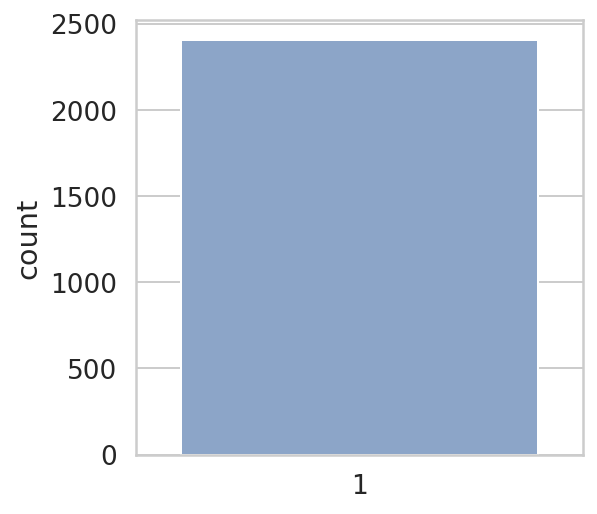

In [123]:
FZHP_ct = pd.crosstab(data.Surname, data.HomePlanet)
plt.figure(figsize=(4,4))
sns.countplot((FZHP_ct>0).sum(axis =1))

💡 **Insight**
* There are no families with a different homeplanet; we can therefore fill homeplanet missing values according to that.

In [124]:
def impute_homeplanet_by_surname(df: pd.DataFrame) -> pd.DataFrame:

    last_name_to_planet = df.groupby("Surname")["HomePlanet"].agg(pd.Series.mode).to_dict()

    keys_to_remove = []
    for key, value in last_name_to_planet.items():
        if type(value) != str:
            keys_to_remove.append(key)

    for key_to_remove in keys_to_remove:
        last_name_to_planet.pop(key_to_remove)

    for last_name, home_planet in last_name_to_planet.items():
        df.loc[df["Surname"] == last_name, "HomePlanet"] = home_planet
        
    return df
impute_homeplanet_by_surname_transformer = FunctionTransformer(impute_homeplanet_by_surname)

In [125]:
HP_bef=data['HomePlanet'].isna().sum()
data = impute_homeplanet_by_surname_transformer.fit_transform(data)
# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


In [126]:
# Only 10 HomePlanet missing values left - let's look at them
data[data['HomePlanet'].isna()][['HomePlanet','Destination']]

HomePlanet  Destination
2274         NaN  TRAPPIST-1e
2631         NaN  TRAPPIST-1e
3091         NaN  TRAPPIST-1e
4548         NaN  TRAPPIST-1e
5762         NaN  TRAPPIST-1e
8969         NaN  TRAPPIST-1e
10583        NaN  TRAPPIST-1e
11913        NaN  TRAPPIST-1e
12551        NaN  TRAPPIST-1e
12725        NaN  TRAPPIST-1e

💡**Insights**
* Everyone left is heading towards TRAPPIST-1e. So let's look at the joint distribution of HomePlanet and Destination.

### 3.1.4. HomePlanet and Destination

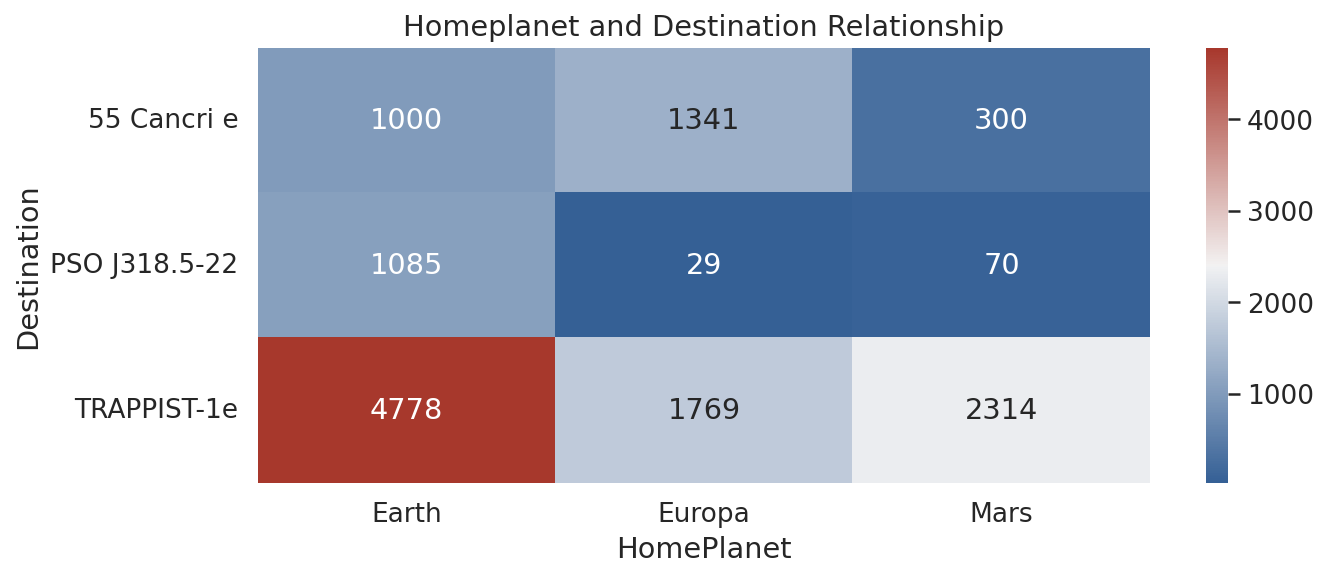

In [127]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap=cmap)
plt.title('Homeplanet and Destination Relationship')
plt.savefig('Homeplanet and Destination Relationship.png')

💡**Insights**
* Most people heading towards TRAPPIST-1e came from Earth so it makes sense to guess they came from there. But remember from earlier, no one on deck D came from Earth so we need to filter these out.

In [128]:
def impute_homeplanet_rest(data):
  data.loc[(data['HomePlanet'].isna()) & ~(data['CabinDeck']=='D'), 'HomePlanet']='Earth'
  data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='D'), 'HomePlanet']='Mars'
  return data


In [129]:
impute_homeplanet_rest_transformer = FunctionTransformer(impute_homeplanet_rest)
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

data = impute_homeplanet_rest_transformer.fit_transform(data)

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


## 3.2. Filling Destination Missing Values

💡**Insight**
* From the correlation matrix (above)`Destination`is highly correlated to `CabinDeck`and `Surname`after `HomePlanet`.

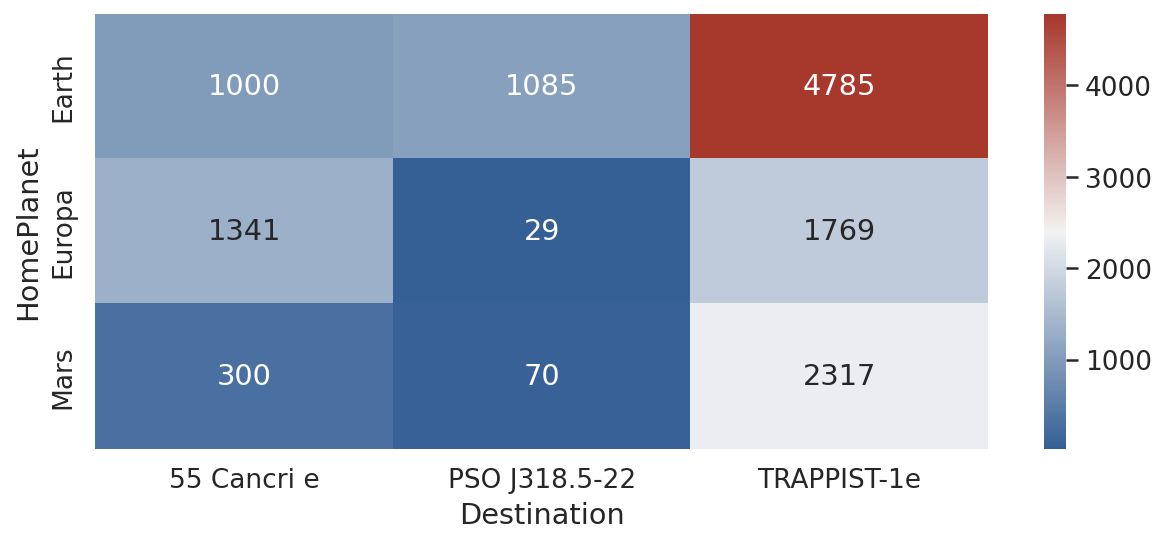

In [130]:
DD_gb=data.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

plt.figure(figsize=(10,4))
sns.heatmap(DD_gb.T, annot=True, fmt='g', cmap=cmap)

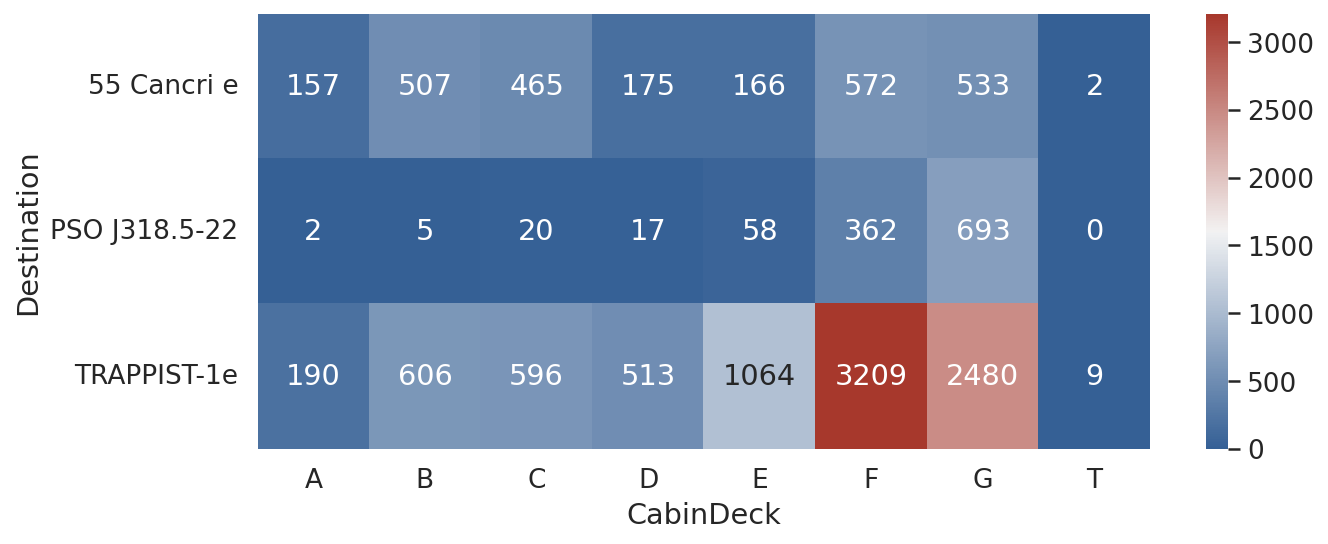

In [131]:
DD_ct = pd.crosstab(data.CabinDeck, data.Destination)
plt.figure(figsize=(10,4))
sns.heatmap(DD_ct.T, annot=True, fmt='g', cmap=cmap)

💡**Insight**
* On all, the majority of passengers are heading towards "TRAPPIST-1e" therefore lets just impute the mode.

In [132]:
def impute_destination(data):
  data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'
  return data

impute_destination_transformer = FunctionTransformer(impute_destination)

D_bef=data['Destination'].isna().sum()
data = impute_destination_transformer.fit_transform(data)

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())





#Destination missing values before: 274
#Destination missing values after: 0


## 3.3. Filling Surname Missing Values

We're filling in missing surnames since we'll require them later to fill in missing data for other features. It also ensures that we can increase the accuracy of the family size feature.

### 3.3.1. Surname and Group

Text(0.5, 1.0, 'Number of unique surnames by group')

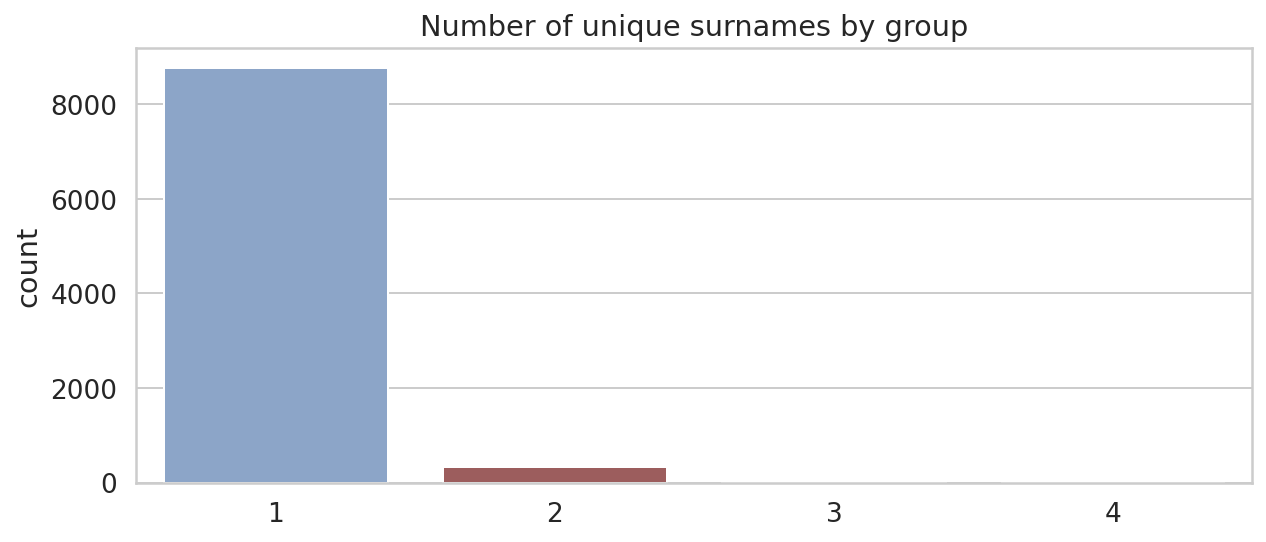

In [133]:
# Joint distribution of Group and Surname
GSN_ct=pd.crosstab(data.PassengerGroup,data.Surname)
# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((GSN_ct>0).sum(axis=1))
plt.title('Number of unique surnames by group')

💡**Insights**
* The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.

In [134]:
GSN_ct=pd.crosstab(data.PassengerGroup,data.Surname)
GSN_ct

Surname         Acobson  Acobsond  Adavisons  Adkinson  Admingried  Ageurante  \
PassengerGroup                                                                  
1                     0         0          0         0           0          0   
2                     0         0          0         0           0          0   
3                     0         0          0         0           0          0   
4                     0         0          0         0           0          0   
5                     0         0          0         0           0          0   
...                 ...       ...        ...       ...         ...        ...   
9276                  0         0          0         0           0          0   
9277                  0         0          0         0           0          0   
9278                  0         0          0         0           0          0   
9279                  0         0          0         0           0          0   
9280                  0         0          0         0           0          0   

Surname         Aginge  Aginoid  Ailled  Aillyber  ...  Wooterston  Workmans  \
PassengerGroup                                     ...                         
1                    0        0       0         0  ...           0         0   
2                    0        0       0         0  ...           0         0   
3                    0        0       0         0  ...           0         0   
4                    0        0       0         0  ...           0         0   
5                    0        0       0         0  ...           0         0   
...                ...      ...     ...       ...  ...         ...       ...   
9276                 0        0       0         0  ...           0         0   
9277                 0        0       0         0  ...           0         0   
9278                 0        0       0         0  ...           0         0   
9279                 0        0       0         0  ...           0         0   
9280                 0        0       0         0  ...           0         0   

Surname         Workmanson  Wrempeedly  Wriggins  Wynneyerson  Yanton  \
PassengerGroup                                                          
1                        0           0         0            0       0   
2                        0           0         0            0       0   
3                        0           0         0            0       0   
4                        0           0         0            0       0   
5                        0           0         0            0       0   
...                    ...         ...       ...          ...     ...   
9276                     0           0         0            0       0   
9277                     0           0         0            0       0   
9278                     0           0         0            0       0   
9279                     0           0         0            0       0   
9280                     0           0         0            0       0   

Surname         Yatters  Yorkland  Youngrayes  
PassengerGroup                                 
1                     0         0           0  
2                     0         0           0  
3                     0         0           0  
4                     0         0           0  
5                     0         0           0  
...                 ...       ...         ...  
9276                  0         0           0  
9277                  0         0           0  
9278                  0         0           0  
9279                  0         0           0  
9280                  0         0           0  

[9125 rows x 2406 columns]

In [135]:
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['PassengerGroup']).isin(GSN_ct.index)].index
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['PassengerGroup'].map(lambda x: GSN_ct.idxmax(axis=1)[x])


In [136]:
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['PassengerGroup']).isin(GSN_ct.index)].index
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['PassengerGroup'].map(lambda x: GSN_ct.idxmax(axis=1)[x])


In [137]:
def impute_surname(data):
  GSN_ct=pd.crosstab(data.PassengerGroup,data.Surname)
  GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['PassengerGroup']).isin(GSN_ct.index)].index
  data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['PassengerGroup'].map(lambda x: GSN_ct.idxmax(axis=1)[x])

  return data

impute_surname_transformer = FunctionTransformer(impute_surname)

# Missing values before
SN_bef=data['Surname'].isna().sum()

data = impute_surname_transformer.fit_transform(data)

# Print number of missing values left
print('#Surname missing values before:',SN_bef)
print('#Surname missing values after:',data['Surname'].isna().sum())






#Surname missing values before: 155
#Surname missing values after: 155


In [138]:
def update_familysize(data):
  data['Surname'].fillna('Unknown', inplace=True)

  # Update family size feature
  data['FamilySize']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

  # Put NaN's back in place of outliers
  data.loc[data['Surname']=='Unknown','Surname']=np.nan

  # Say unknown surname means no family
  data.loc[data['FamilySize']>100,'FamilySize']=0

  return data


In [139]:
data = update_familysize(data)

## 3.4 Filling Cabin Missing Values

### 3.4.1. Cabin Side and Group

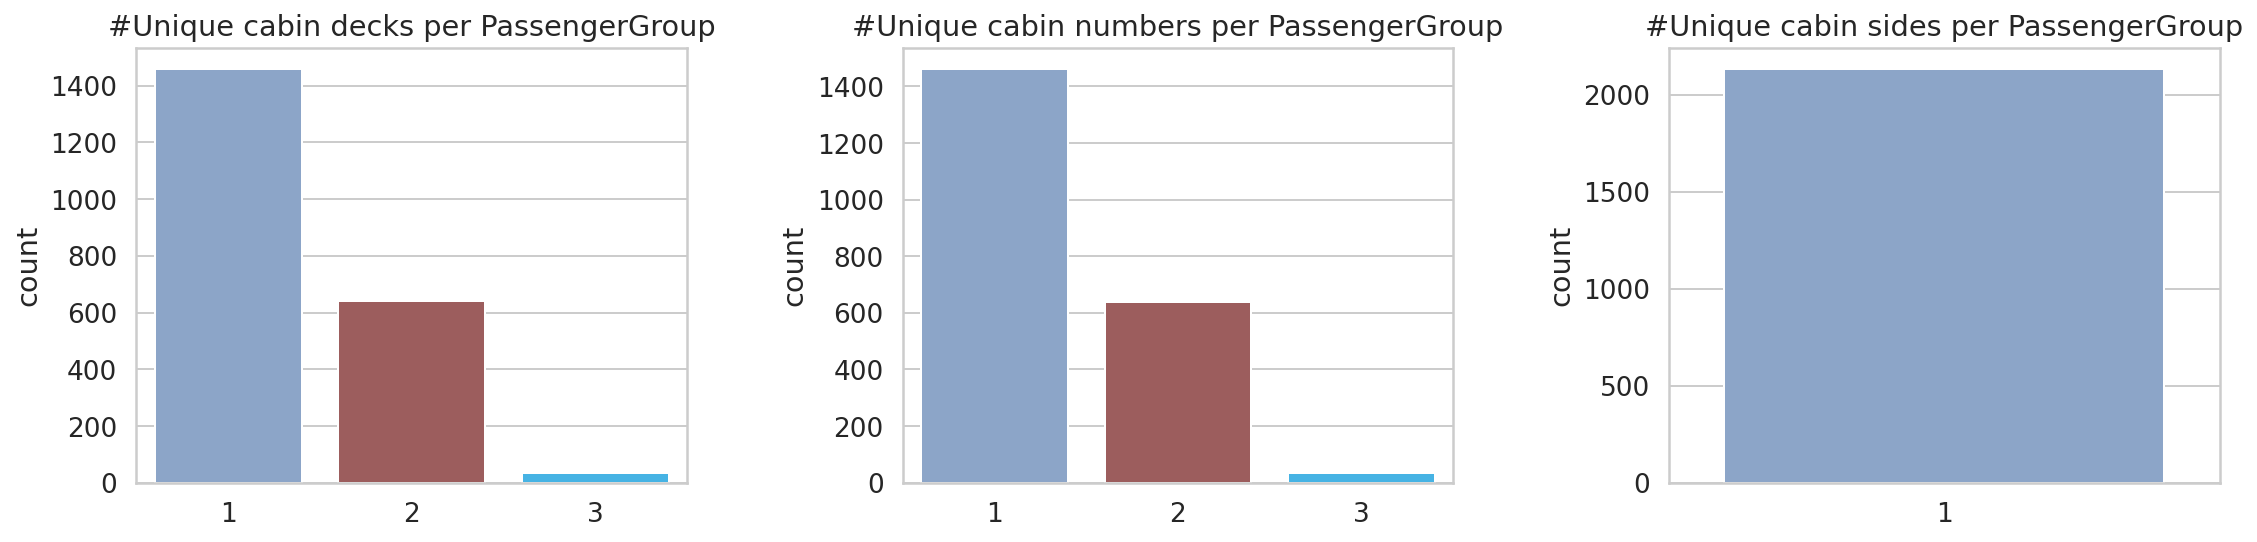

In [144]:

# Joint distribution of PassengerGroup and Cabin features
GCD_gb=pd.crosstab(data[data['GroupSize']>1].PassengerGroup,data[data['GroupSize']>1].CabinDeck)
GCN_gb= pd.crosstab(data[data['GroupSize']>1].PassengerGroup,data[data['GroupSize']>1].CabinNumber)
GCS_gb =pd.crosstab(data[data['GroupSize']>1].PassengerGroup,data[data['GroupSize']>1].CabinSide)    

# Countplots
fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot((GCD_gb>0).sum(axis=1))
plt.title('#Unique cabin decks per PassengerGroup')

plt.subplot(1,3,2)
sns.countplot((GCN_gb>0).sum(axis=1))
plt.title('#Unique cabin numbers per PassengerGroup')

plt.subplot(1,3,3)
sns.countplot((GCS_gb>0).sum(axis=1))
plt.title('#Unique cabin sides per PassengerGroup')
fig.tight_layout()
fig.savefig('Cabin and Passenger Group.png')


💡**Insight**
* Everyone in the same PassengerGroup is also on the same CabinSide. 
* For CabinDeck and CabinNumber there is also a fairly good but not perfect correlation.

In [145]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Passengers with missing Cabin side and in a PassengerGroup with known Cabin side
GCS_index=data[data['CabinSide'].isna()][(data[data['CabinSide'].isna()]['PassengerGroup']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'CabinSide']=data.iloc[GCS_index,:]['PassengerGroup'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 299
#CabinSide missing values after: 162


### 3.4.2. CabinSide and Surname

Text(0.5, 1.0, 'Ratio of cabin side by surname')

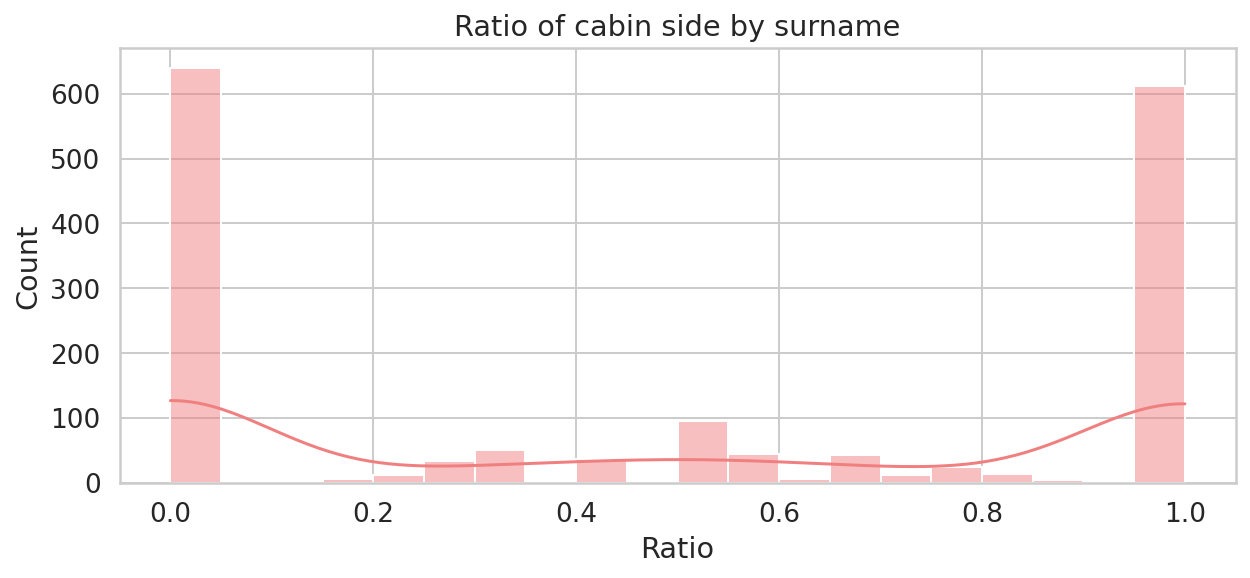

In [146]:
SCS_gb=pd.crosstab(data[data['GroupSize']>1].Surname,data[data['GroupSize']>1].CabinSide)

# Ratio of sides
SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

# Histogram of ratio
plt.figure(figsize=(10,4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
plt.title('Ratio of cabin side by surname')

In [147]:
# Print proportion
print('Percentage of families all on the same cabin side:', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')

# Another view of the same information
SCS_gb.head()

Percentage of families all on the same cabin side: 76.7 %


CabinSide   P  S  Ratio
Surname                
Acobson     0  3    0.0
Acobsond    3  0    1.0
Adavisons   6  0    1.0
Admingried  0  4    0.0
Aginge      3  0    1.0

💡**Insights**
* This demonstrates that families prefer to be on the same cabin side (in fact, 77% of families are totally on the same side).

In [148]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
SCS_index=data[data['CabinSide'].isna()][(data[data['CabinSide'].isna()]['Surname']).isin(SCS_gb.index)].index

# Fill corresponding missing values
data.loc[SCS_index,'CabinSide']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

# Drop surname (we don't need it anymore)
#data.drop('Surname', axis=1, inplace=True)

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 162
#CabinSide missing values after: 66


In [149]:
# Value counts
data['CabinSide'].value_counts()

S    6504
P    6400
Name: CabinSide, dtype: int64

An outlier will be used to fill in the last few missing data. This is due to the fact that we are genuinely unsure of which of the two (balanced) sides to allocate.

In [150]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['CabinSide'].isna(),'CabinSide']='Z'

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 66
#CabinSide missing values after: 0


SInce groups tend do be on the same cabin deck:

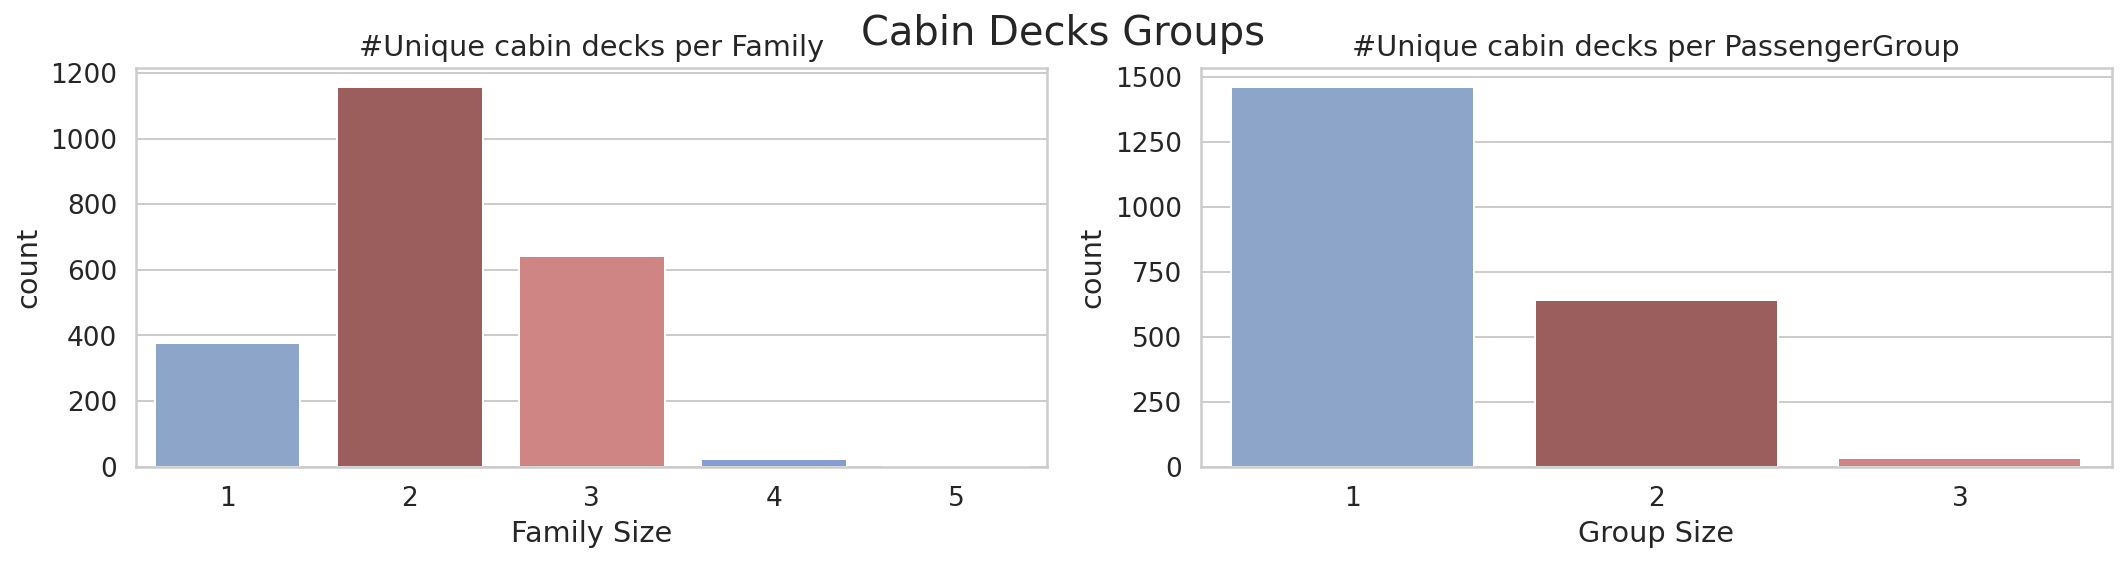

In [163]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
fig.suptitle('Cabin Decks Groups\n', size=20)
GCD_gb01=pd.crosstab(data[data['FamilySize']>1].Surname,data[data['FamilySize']>1].CabinDeck)
GCD_gb02=pd.crosstab(data[data['GroupSize']>1].PassengerGroup,data[data['GroupSize']>1].CabinDeck)


sns.countplot((GCD_gb01>0).sum(axis=1),ax = ax1)
ax1.set_title('#Unique cabin decks per Family')
ax1.set_xlabel('Family Size')

sns.countplot((GCD_gb02>0).sum(axis=1), ax = ax2)
ax2.set_title('#Unique cabin decks per PassengerGroup')
ax2.set_xlabel('Group Size')
fig.tight_layout()

fig.savefig('Cabin Groups.png')


In [164]:
# Missing values before
CD_bef=data['CabinDeck'].isna().sum()

# Passengers with missing Cabin deck and in a PassengerGroup with known majority Cabin deck
GCD_index=data[data['CabinDeck'].isna()][(data[data['CabinDeck'].isna()]['PassengerGroup']).isin(GCD_gb.index)].index

# Fill corresponding missing values
data.loc[GCD_index,'CabinDeck']=data.iloc[GCD_index,:]['PassengerGroup'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#CabinDeck missing values before:',CD_bef)
print('#CabinDeck missing values after:',data['CabinDeck'].isna().sum())

#CabinDeck missing values before: 299
#CabinDeck missing values after: 162


### 3.4.3. CabinDeck and HomePlanet

In [165]:
pd.crosstab([data.HomePlanet, data.Destination, data.Solo],data.CabinDeck )

CabinDeck                        A    B    C    D    E     F     G  T
HomePlanet Destination   Solo                                        
Earth      55 Cancri e   0       0    0    0    0   20    90   272  0
                         1       0    0    0    0   47   289   269  0
           PSO J318.5-22 0       0    0    0    0   18    67   230  0
                         1       0    0    0    0   25   262   466  0
           TRAPPIST-1e   0       0    0    0    0  133   438  1075  0
                         1       0    0    0    0  358  1350  1509  0
Europa     55 Cancri e   0      96  377  313   59   35     0     0  2
                         1      67  141  159   46   34     0     0  0
           PSO J318.5-22 0       2    5   11    0    0     0     0  0
                         1       0    0   10    0    0     0     0  0
           TRAPPIST-1e   0     152  459  428  120   53     0     0  1
                         1      44  179  201   84   82     0     0  8
Mars       55 Cancri e   0       0    0    0   32   15   104     0  0
                         1       0    0    0   40   16    92     0  0
           PSO J318.5-22 0       0    0    0    8    9    14     0  0
                         1       0    0    0    9    7    21     0  0
           TRAPPIST-1e   0       0    0    0  168  219   798     0  0
                         1       0    0    0  164  263   743     0  0

In [166]:
pd.crosstab([data.HomePlanet, data.Destination, data.Solo],data.CabinDeck ).loc['Mars'].sum(axis = 0).to_frame()

0
CabinDeck      
A             0
B             0
C             0
D           421
E           529
F          1772
G             0
T             0

💡**Insights**
* Passengers from Mars are most likely in deck F.

In [167]:
# Joint distribution
data.groupby(['HomePlanet','Solo','CabinDeck'])['CabinDeck'].size().unstack().fillna(0).loc['Europa']

CabinDeck      A      B      C      D      E    F    G    T
Solo                                                       
0          250.0  841.0  752.0  179.0   88.0  0.0  0.0  3.0
1          111.0  320.0  370.0  130.0  116.0  0.0  0.0  8.0

💡**Insights**
* Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.

In [168]:

pd.crosstab([data.HomePlanet, data.Destination, data.Solo],data.CabinDeck ).loc['Earth'].sum(axis = 0)

CabinDeck
A       0
B       0
C       0
D       0
E     601
F    2496
G    3821
T       0
dtype: int64

💡**Insights**
* Passengers from Earth are (more or less) most likely in deck G

In [169]:
# Missing values before
CD_bef=data['CabinDeck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=data.loc[data['CabinDeck'].isna(),'CabinDeck'].index
data.loc[data['CabinDeck'].isna(),'CabinDeck']=data.groupby(['HomePlanet','Destination','Solo'])['CabinDeck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#CabinDeck missing values before:',CD_bef)
print('#CabinDeck missing values after:',data['CabinDeck'].isna().sum())

#CabinDeck missing values before: 162
#CabinDeck missing values after: 0


### 3.4.4. CabinNumber and CabinDeck

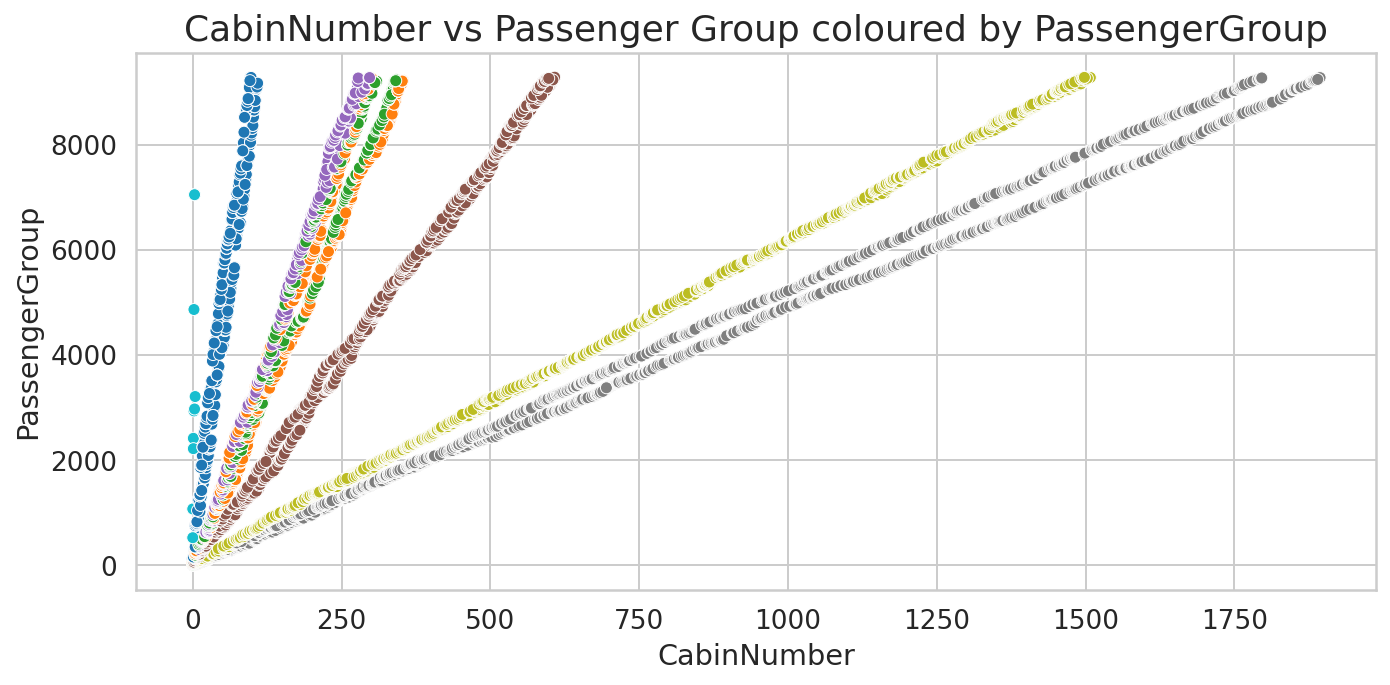

In [172]:
# Scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(x=data['CabinNumber'], y=data['PassengerGroup'], c=LabelEncoder().fit_transform(data.loc[~data['CabinNumber'].isna(),'CabinDeck']), cmap='tab10')
plt.title('CabinNumber vs Passenger Group coloured by PassengerGroup',fontsize=18)
plt.tight_layout()
plt.savefig('PassengerLinearRegressionCabin.png')


💡**Insight**
* On a deck-by-deck basis, there is a linear relationship between the cabin number and group number. In order to obtain a rough cabin number, we may extrapolate the missing cabin numbers using linear regression on a deck-by-deck basis.

In [173]:
# Missing values before
CN_bef=data['CabinNumber'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['CabinNumber'].isna()) & (data['CabinDeck']==deck),'PassengerGroup']
    y_CN=data.loc[~(data['CabinNumber'].isna()) & (data['CabinDeck']==deck),'CabinNumber']
    X_test_CN=data.loc[(data['CabinNumber'].isna()) & (data['CabinDeck']==deck),'PassengerGroup']

    # Linear regression
    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['CabinNumber'].isna()) & (data['CabinDeck']==deck),'CabinNumber']=preds_CN.astype(int)

# Print number of missing values left
print('#CabinNumber missing values before:',CN_bef)
print('#CabinNumber missing values after:',data['CabinNumber'].isna().sum())

#CabinNumber missing values before: 299
#CabinNumber missing values after: 0


In [174]:
 #One-hot encode cabin regions
data['Cabin_region1']=(data['CabinNumber']<300).astype(int)
data['Cabin_region2']=((data['CabinNumber']>=300) & (data['CabinNumber']<600)).astype(int)
data['Cabin_region3']=((data['CabinNumber']>=600) & (data['CabinNumber']<900)).astype(int)
data['Cabin_region4']=((data['CabinNumber']>=900) & (data['CabinNumber']<1200)).astype(int)
data['Cabin_region5']=((data['CabinNumber']>=1200) & (data['CabinNumber']<1500)).astype(int)
data['Cabin_region6']=((data['CabinNumber']>=1500) & (data['CabinNumber']<1800)).astype(int)
data['Cabin_region7']=(data['CabinNumber']>=1800).astype(int)

## 3.5 Filling VIP Missing Values

### 3.5.1.VIP and AgeClass

In [175]:
pd.crosstab(data.AgeClass,data.VIP)

VIP       False  True
AgeClass             
Baby        457     0
Kid         888     0
Teen       2675     5
Adult      7814   255
Senior      308    11

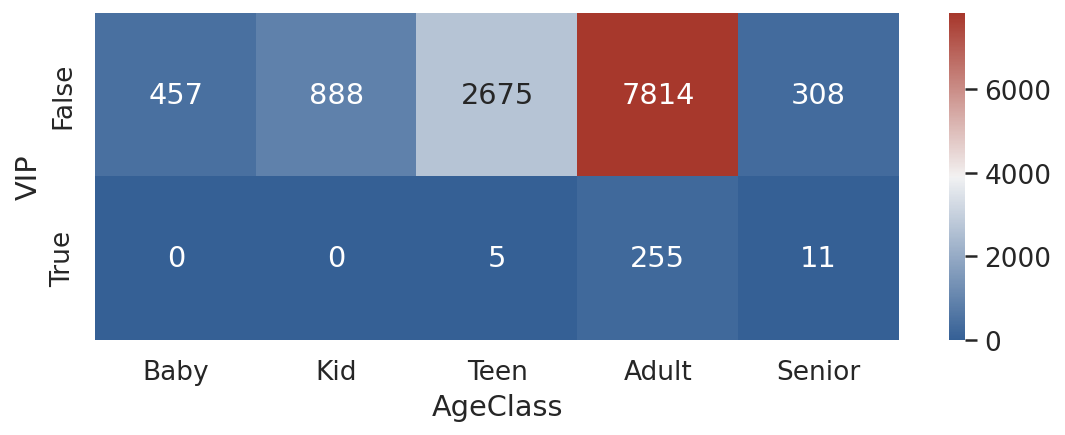

In [176]:
plt.figure(figsize=(9,3))
sns.heatmap(pd.crosstab(data.AgeClass,data.VIP).T, annot = True, fmt = 'g',cmap = cmap)

In [177]:
# Missing values before
V_bef=data['VIP'].isna().sum()

data.loc[(data['VIP'].isna()) & (data['AgeClass'].isin(['Baby', 'Kid', 'Teen', 'Senior'])), 'VIP']=False

#V_index = data[data['VIP'].isna()][(data[data['VIP'].isna()])[''].isin(V_bef.index)].index
# Fill missing values with mode
#data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 193


### 3.5.2. VIP and HomePlanet

In [178]:
pd.crosstab(data.HomePlanet,data.VIP,margins = True).round(3)

VIP         False  True    All
HomePlanet                    
Earth        6937     0   6937
Europa       2953   179   3132
Mars         2614    94   2708
All         12504   273  12777

💡**Insight**
* No passengers coming from Earth are VIP.

In [179]:
# Missing values before
V_bef=data['VIP'].isna().sum()

data.loc[(data['VIP'].isna()) & (data['HomePlanet'].isin(['Earth'])), 'VIP']=False

#V_index = data[data['VIP'].isna()][(data[data['VIP'].isna()])[''].isin(V_bef.index)].index
# Fill missing values with mode
#data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 193
#VIP missing values after: 111


In [180]:
len(data[(data['VIP'].isna())&(data['No_Expenditure'])==True])

51

In [181]:
data.groupby(['VIP'])[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_Expenditure',	'No_Expenditure',	'Luxury_Expenditure',	'Basic_Expenditure']].mean().round(2)

RoomService  FoodCourt  ShoppingMall     Spa   VRDeck  \
VIP                                                            
False       216.30     415.33        173.34  291.28   283.13   
True        486.35    1793.65        273.68  932.85  1207.20   

       Total_Expenditure  No_Expenditure  Luxury_Expenditure  \
VIP                                                            
False            1349.33            0.43              773.99   
True             4595.54            0.13             2574.65   

       Basic_Expenditure  
VIP                       
False             575.34  
True             2020.89

💡**Insight**
* Most VIP customers have spent something.

In [182]:
# Missing values before
V_bef=data['VIP'].isna().sum()

data.loc[(data['VIP'].isna()) & (data['No_Expenditure'] == True), 'VIP']=False



# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 111
#VIP missing values after: 60


In [183]:
pd.crosstab(data.PassengerNumber,data.VIP)

VIP              False  True
PassengerNumber             
1                 9057   183
2                 2061    58
3                  821    17
4                  325    11
5                  183     1
6                  105     3
7                   66     0
8                   19     0

💡**Insight**:
* Most VIP passangers have PassengerNum 1, or 2.

In [184]:
# Missing values before
V_bef=data['VIP'].isna().sum()

data.loc[(data['VIP'].isna()) & (data['PassengerNumber'].isin([1,2,3,4])), 'VIP']=True



#V_index = data[data['VIP'].isna()][(data[data['VIP'].isna()])[''].isin(V_bef.index)].index
# Fill missing values with mode
#data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 60
#VIP missing values after: 0


## 3.6 Filling Age Missing Values

In [185]:
# Joint distribution
data.groupby(['HomePlanet','No_Expenditure','Solo','CabinDeck'])['Age'].median().unstack().fillna(0)

CabinDeck                          A     B     C     D     E     F     G     T
HomePlanet No_Expenditure Solo                                                
Earth      0              0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                          1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1              0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                          1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0              0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                          1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1              0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                          1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0              0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                          1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1              0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                          1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

💡**Insights**
* We will impute missing values based on the median of these subgroups because age varies across various characteristics, including HomePlanet, group size, spending, and cabin deck.

In [186]:
expense_cols = ['FoodCourt', 'ShoppingMall', 'RoomService', 'Spa', 'VRDeck']

In [187]:
# Missing values before
A_bef=data[expense_cols].isna().sum().sum()

# Fill missing values using the median
na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_Expenditure','Solo','CabinDeck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


In [188]:
data = discretization_age(data)

## 3.7 Filling CyroSleep Missing Values

### 3.7.1. CyroSleep and No_Expenditure

Makes sense that passengers that were confined, did not spend anything.

In [189]:
pd.crosstab(data.No_Expenditure,data.CryoSleep)

CryoSleep       False  True
No_Expenditure             
0                7339     0
1                 740  4581

In [190]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_Expenditure'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


## 3.8 Filling Expenditure Missing Values

### 3.8.1.Expenditure and CyroSleep

In [191]:

expense_cols = ["FoodCourt", "ShoppingMall", "RoomService", "Spa", "VRDeck"]

In [192]:
print('Maximum expenditure of passengers in CryoSleep:',data.loc[data['CryoSleep']==True,expense_cols].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [193]:
# Missing values before
E_bef=data[expense_cols].isna().sum().sum()

# CryoSleep has no expenditure
for col in expense_cols:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[expense_cols].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


### 3.8.2. Expenditure and other

In [194]:
# Joint distribution
data.groupby(['HomePlanet','Solo','AgeClass'])['Total_Expenditure'].mean().unstack().fillna(0).round(1)

AgeClass         Baby     Kid    Teen   Adult  Senior
HomePlanet Solo                                      
Earth      0      0.0    55.3   764.9   763.9   994.5
           1      0.0   385.4   757.3   789.3   885.3
Europa     0      0.0   749.5  1809.0  3666.4  3225.3
           1      0.0     0.0  2401.9  3772.2  3993.5
Mars       0      0.0   256.7  1072.2  1199.6  1617.2
           1      0.0  1106.3  1184.9  1100.9  1113.2

In [195]:
# Missing values before
E_bef=data[expense_cols].isna().sum().sum()

# Fill remaining missing values using the median
for col in expense_cols:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','AgeClass'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[expense_cols].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 0


In [196]:
# Update expenditure and no_spending
data = add_totalexpenditure(data)
data = add_luxury_basic_expenditure(data)
#data['Total_Expenditure']=data[expenditure_cols].sum(axis=1)
#data['No_Expenditure']=(data['Total_Expenditure']==0).astype(int)

In [197]:
data.isna().sum()

PassengerId             0
HomePlanet              0
CryoSleep               0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                  294
CabinDeck               0
CabinNumber             0
CabinSide               0
Cabin_region1           0
Cabin_region2           0
Cabin_region3           0
Cabin_region4           0
Cabin_region5           0
Cabin_region6           0
Cabin_region7           0
PassengerGroup          0
PassengerNumber         0
GroupSize               0
Solo                    0
Firstname             294
Surname               155
FamilySize              0
Total_Expenditure       0
No_Expenditure          0
Luxury_Expenditure      0
Basic_Expenditure       0
AgeClass                0
dtype: int64

# 4. Saving Imputed and Cleaned Data

In [198]:
data = data.set_index('PassengerId')

In [200]:
#data.to_csv('ready_data/full_data2.csv')

In [201]:
data.nunique()

HomePlanet                3
CryoSleep                 2
Destination               3
Age                      83
VIP                       2
RoomService            1594
FoodCourt              1973
ShoppingMall           1385
Spa                    1697
VRDeck                 1660
Name                  12629
CabinDeck                 8
CabinNumber            1895
CabinSide                 3
Cabin_region1             2
Cabin_region2             2
Cabin_region3             2
Cabin_region4             2
Cabin_region5             2
Cabin_region6             2
Cabin_region7             2
PassengerGroup         9280
PassengerNumber           8
GroupSize                 8
Solo                      2
Firstname              2883
Surname                2406
FamilySize               20
Total_Expenditure      3463
No_Expenditure            2
Luxury_Expenditure     3229
Basic_Expenditure      2658
AgeClass                  5
dtype: int64

In [202]:
y=df_train['Transported'].astype('bool').astype(int)
X=data[data.index.isin(df_train.index)].copy()
X_test=data[data.index.isin(df_test.index)].copy()

print(y.shape)
print(X.shape)
print(X_test.shape)

(8693,)
(8693, 33)
(4277, 33)


In [ ]:
# train_data = X
# train_data['Transported'] = y

# test_data = X_test

# print(train_data.shape)
# print(test_data.shape)

In [ ]:
#train_data.to_csv('ready_data/train_data.csv')
#test_data.to_csv('ready_data/test_data.csv')


# 5. Reading the Cleaned Data Sets 


In [203]:
RANDOM_STATE = 2022
SAMPLE_SIZE = 1.0
TEST_SIZE = 0.3
SIGNICIFANT_LEVEL = 0.05


CLEAN_TRAIN_PATH = 'ready_data/train_data.csv'
CLEAN_TEST_PATH = 'ready_data/test_data.csv'

INDEX = 'PassengerId'
TARGET = 'Transported'
NUM_FOLDS = 3
N_CLUSTERS = 5

OUTPUT_PATH = "submissions/submission_13.csv"

SCORING = "accuracy"

SUBMISSION_FILE = 'submissions/submission_13.csv'

In [204]:
def read_clean_data(clean_train_path = CLEAN_TRAIN_PATH, clean_test_path = CLEAN_TEST_PATH):
  df_train = pd.read_csv(CLEAN_TRAIN_PATH, index_col=INDEX)
  df_test = pd.read_csv(CLEAN_TEST_PATH, index_col=INDEX)
  return df_train, df_test



In [205]:
df_train, df_test = read_clean_data()

print('df_train set shape:', df_train.shape)
print('df_test set shape:', df_test.shape)
df_train.head()

df_train set shape: (8693, 34)
df_test set shape: (4277, 33)


HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  \
PassengerId                                                                
0001_01         Europa      False  TRAPPIST-1e  39.0  False          0.0   
0002_01          Earth      False  TRAPPIST-1e  24.0  False        109.0   
0003_01         Europa      False  TRAPPIST-1e  58.0   True         43.0   
0003_02         Europa      False  TRAPPIST-1e  33.0  False          0.0   
0004_01          Earth      False  TRAPPIST-1e  16.0  False        303.0   

             FoodCourt  ShoppingMall     Spa  VRDeck  ... Solo Firstname  \
PassengerId                                           ...                  
0001_01            0.0           0.0     0.0     0.0  ...    1     Maham   
0002_01            9.0          25.0   549.0    44.0  ...    1    Juanna   
0003_01         3576.0           0.0  6715.0    49.0  ...    0    Altark   
0003_02         1283.0         371.0  3329.0   193.0  ...    0     Solam   
0004_01           70.0         151.0   565.0     2.0  ...    1     Willy   

                 Surname FamilySize  Total_Expenditure  No_Expenditure  \
PassengerId                                                              
0001_01        Ofracculy          4                0.0               1   
0002_01            Vines          4              736.0               0   
0003_01           Susent          7            10383.0               0   
0003_02           Susent          7             5176.0               0   
0004_01      Santantines          9             1091.0               0   

             Luxury_Expenditure  Basic_Expenditure  AgeClass  Transported  
PassengerId                                                                
0001_01                     0.0                0.0     Adult            0  
0002_01                   702.0               34.0     Adult            1  
0003_01                  6807.0             3576.0     Adult            0  
0003_02                  3522.0             1654.0     Adult            0  
0004_01                   870.0              221.0      Teen            1  

[5 rows x 34 columns]

In [206]:
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()


# 6. Feature Engineering

In [207]:
def make_feature_engineering_pipeline(X,X_test):

  # Function Transformers

  def log1p(feature):
    def func(data):
        data[f'Log{feature}'] = np.log1p(data[feature])
        data = data.drop(columns = feature)
        return data
        
    return func 

  log_transformer = make_pipeline(
  FunctionTransformer(log1p(feature='RoomService')),
  FunctionTransformer(log1p(feature='FoodCourt')),
  FunctionTransformer(log1p(feature='ShoppingMall')),
  FunctionTransformer(log1p(feature='Spa')),
  FunctionTransformer(log1p(feature='VRDeck')),
  FunctionTransformer(log1p(feature='Total_Expenditure')),
  FunctionTransformer(log1p(feature='Luxury_Expenditure')),
  FunctionTransformer(log1p(feature='Basic_Expenditure'))
  )

  def drop_unused_features(data):
    droped_features = [
        'PassengerId',
        'Cabin', 
        'CabinNumber',
        'PassengerGroup',
        'GroupSize',
        'Name', 
        'Firstname', 
        'Surname', 
         'AgeClass']
    
    data.drop(droped_features,  errors='ignore', inplace=True, axis=1) 
    return data

  
  drop_transformer = FunctionTransformer(drop_unused_features)

  def cyro_vip_bool(data):
    data[['CryoSleep','VIP']] = data[['CryoSleep','VIP']].astype('bool').astype(int)
    return data
  
  cyro_vip_transformer = FunctionTransformer(cyro_vip_bool)

  def object_to_category(data):
    obj_cols = ['HomePlanet','Destination','CabinDeck','CabinSide']
    for col in obj_cols:
      data[col] = pd.Categorical(data[col],ordered=False)
    return data

  convert_obj_transformer = FunctionTransformer(object_to_category)



  feature_engineering_pipeline = make_pipeline(
    log_transformer,
    drop_transformer,
    cyro_vip_transformer,
    convert_obj_transformer)
  

  X = feature_engineering_pipeline.fit_transform(X)
  X_test = feature_engineering_pipeline.transform(X_test)

  return X, X_test





In [208]:
df_train, df_test = read_clean_data()

y=df_train['Transported'].astype('bool').astype(int)
X=df_train.drop(columns='Transported')

X_test=df_test

print(y.shape)
print(X.shape)
print(X_test.shape)



X, X_test = make_feature_engineering_pipeline(X,X_test) 

(8693,)
(8693, 33)
(4277, 33)


In [209]:
def make_full_pipeline(classifier):
  continuous_transformer = Pipeline(steps = [
      ('scaler',StandardScaler())
  ])

  categorical_transformer = Pipeline(steps = [
      ('ohe',OneHotEncoder(handle_unknown='ignore',sparse=False))
  ])
  
  
  preprocessor = ColumnTransformer(
      transformers = [
         
          ('cat',categorical_transformer,make_column_selector(dtype_include=['category','object'])),
          ('num',continuous_transformer,make_column_selector(dtype_include=np.number)),
          
      ])
  clf = Pipeline(steps=[('preprocessor',preprocessor),
                        ('classifier',classifier)])
  return clf  

In [210]:
numerical = X.select_dtypes(exclude = ['object', 'category']).columns.to_list()
categorical = X.select_dtypes(include = ['object', 'category']).columns.to_list()


In [211]:
X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(1739, 26) and (1739,) 
The shape of training data:(6954, 26) and (6954,) 


# 7. Modeling

In [212]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(C=0.2, solver='liblinear'),
    'SGD Classifier':SGDClassifier(loss='log'),
    'Decision Tree': DecisionTreeClassifier(max_depth=7),
    "SVC" : SVC(random_state=0, probability=True),
    'Random Forest': RandomForestClassifier(max_depth=7, n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'CatBoost': CatBoostClassifier(iterations=10, learning_rate=0.1, verbose=False),
    'LightGBM': lgb.LGBMClassifier(learning_rate=0.05, n_estimators=500,reg_lambda = 1),
    'XGBoost': XGBClassifier( n_estimators=500,use_label_encoder=False'),
    'KNN':KNeighborsClassifier()
}

# classifiers['stack'] = StackingClassifier(
#     [(k, m) for k,m in classifiers.items()], 
#     final_estimator=LogisticRegression())

In [213]:
def plot_model_result(y_pred,y_true):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

  cf_matrix =confusion_matrix(y_pred, y_true)

  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
  precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
  recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
  f1_score  = 2*precision*recall / (precision + recall)
  stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
  
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax = ax1)
  ax1.set(ylabel= 'True label',xlabel= 'Predicted label' + stats_text)
  ax1.set_title('Confusion matrix')

  RocCurveDisplay.from_predictions(
        y_true, 
        y_pred, 
        ax=ax2)
  ax2.set_title('ROC')

  plt.tight_layout()
  plt.show()

  print(classification_report(y_true, y_pred))



In [214]:
scores = pd.DataFrame(
    np.zeros((len(classifiers), NUM_FOLDS)), 
    index=classifiers.keys(), 
    columns=range(1, NUM_FOLDS+1))

models = dict()

In [215]:
params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)


plt.rc('font', size=15)
plt.rc('axes', titlesize=18)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)
plt.style.use('ggplot')

In [216]:
def make_full_pipeline(classifier):
  continuous_transformer = Pipeline(steps = [
      ('scaler',StandardScaler())
  ])

  categorical_transformer = Pipeline(steps = [
      ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
  ])
  
  
  preprocessor = ColumnTransformer(
      transformers = [
         
          ('num',continuous_transformer,make_column_selector(dtype_include=np.number)),
          ('cat',categorical_transformer,make_column_selector(dtype_include=['category','object'])),
           
         
         
          
      ])
  clf = Pipeline(steps=[('preprocessor',preprocessor),
                        ('classifier',classifier)])
  return clf  

### Model `Naive Bayes`

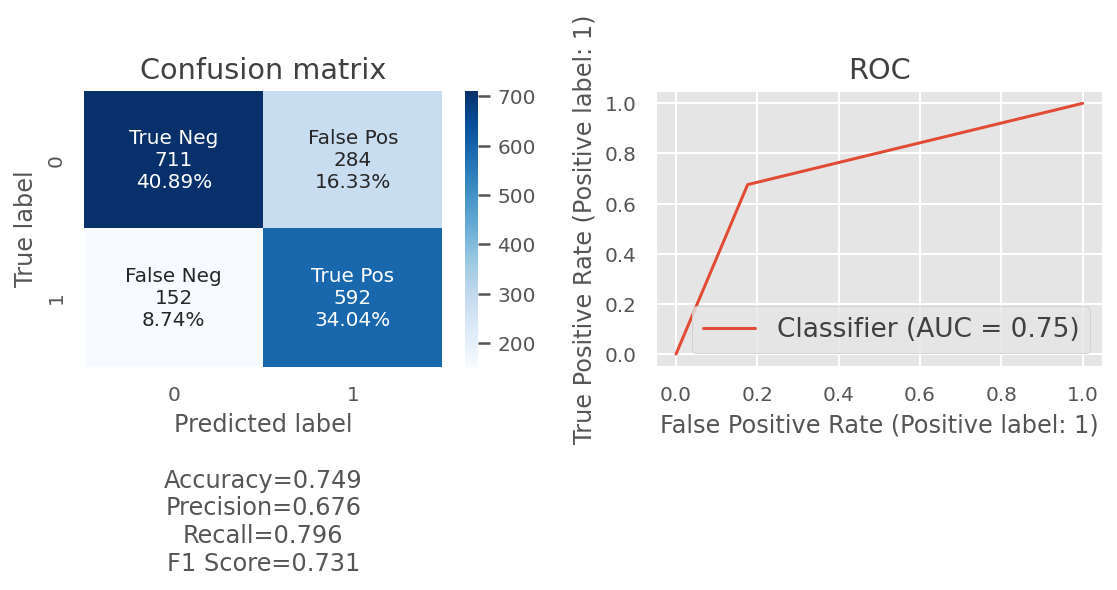

              precision    recall  f1-score   support

           0       0.71      0.82      0.77       863
           1       0.80      0.68      0.73       876

    accuracy                           0.75      1739
   macro avg       0.76      0.75      0.75      1739
weighted avg       0.76      0.75      0.75      1739



### Model `Logistic Regression`

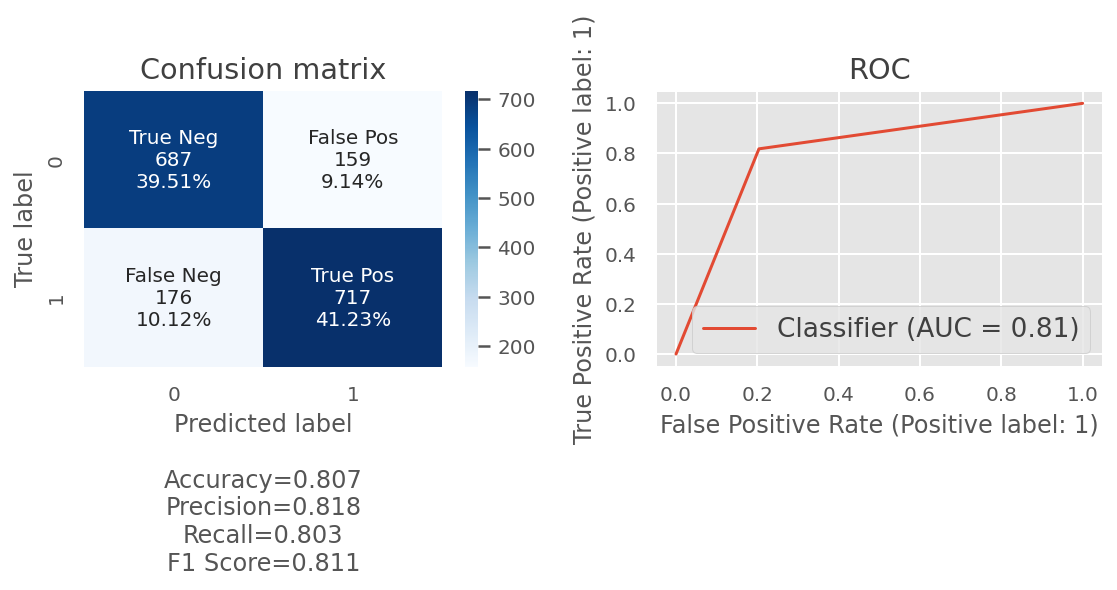

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       863
           1       0.80      0.82      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `SGD Classifier`

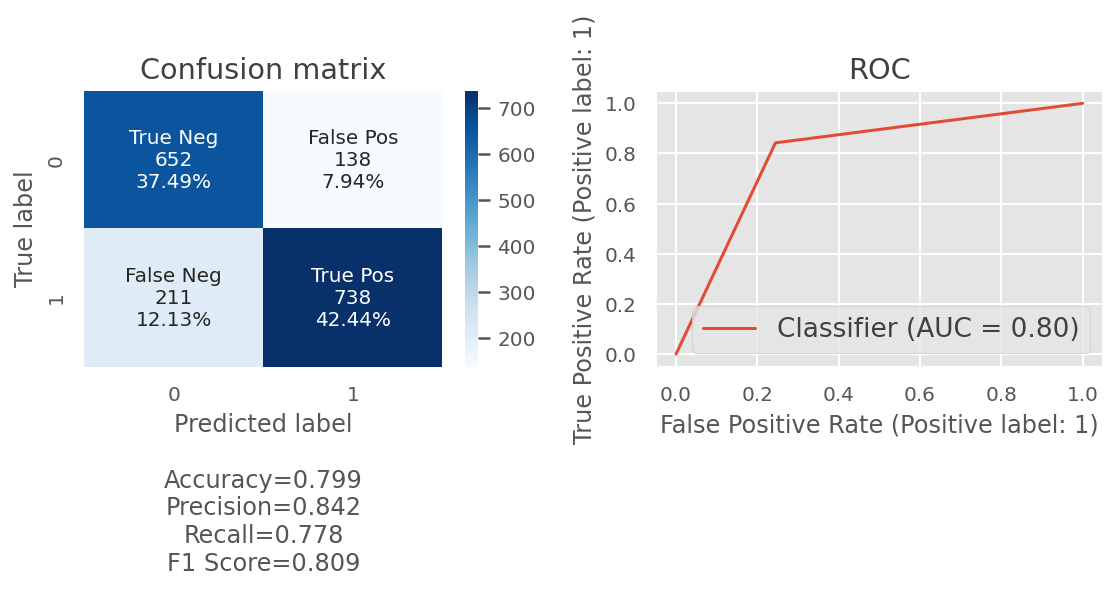

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       863
           1       0.78      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Model `Decision Tree`

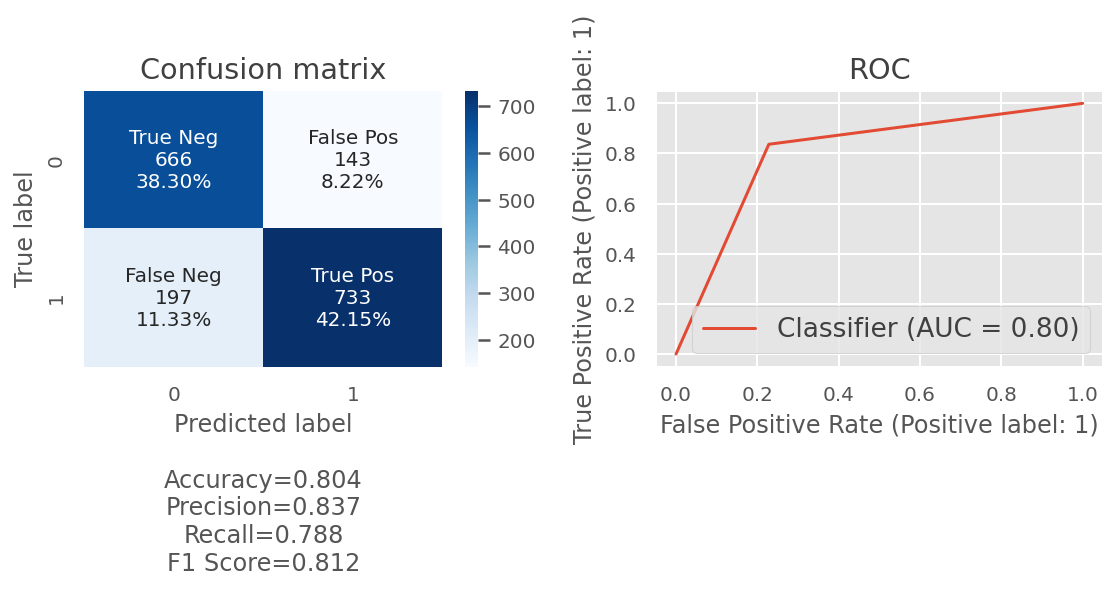

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       863
           1       0.79      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.81      0.80      0.80      1739



### Model `SVC`

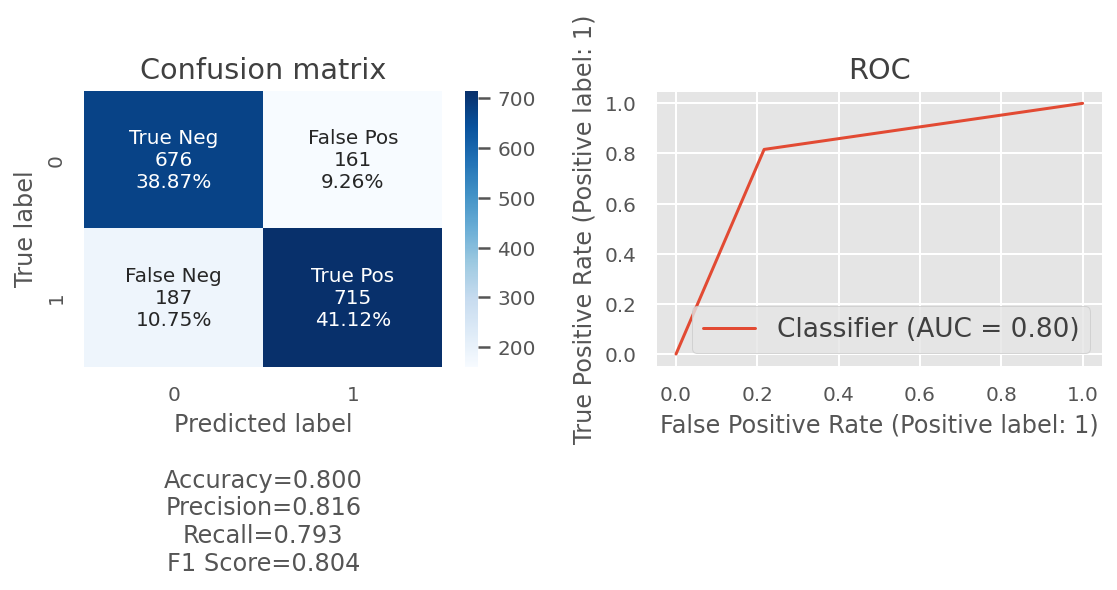

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       863
           1       0.79      0.82      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Model `Random Forest`

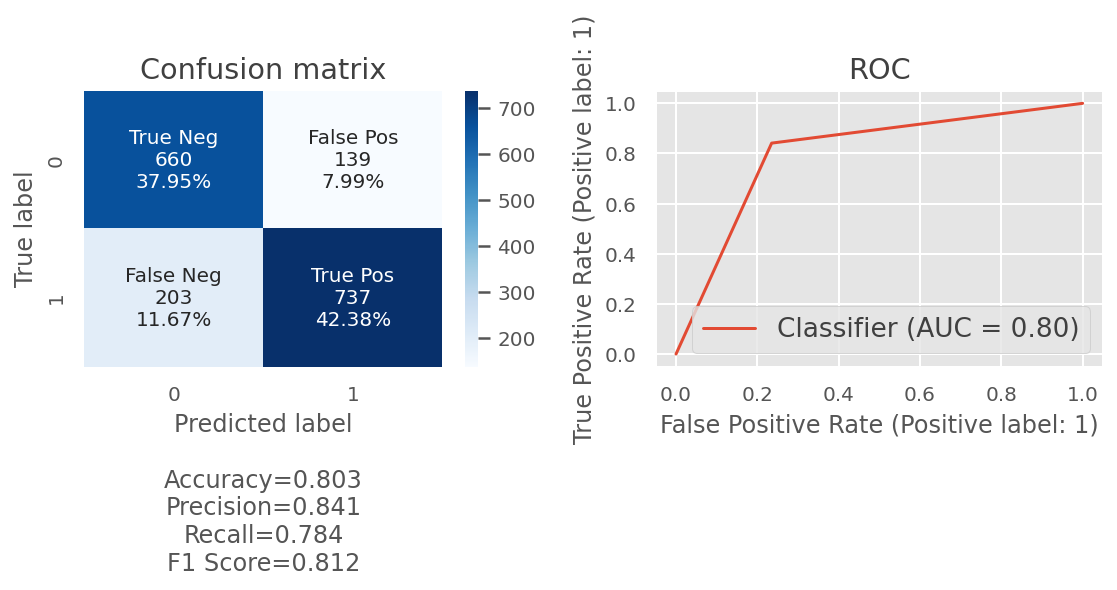

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       863
           1       0.78      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Model `AdaBoost`

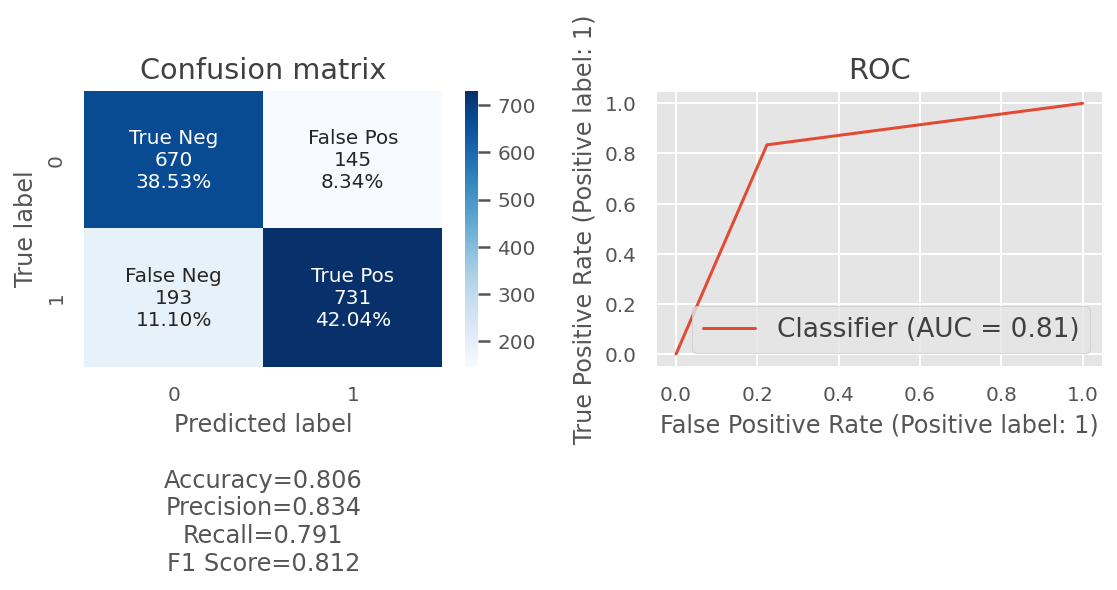

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       863
           1       0.79      0.83      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `CatBoost`

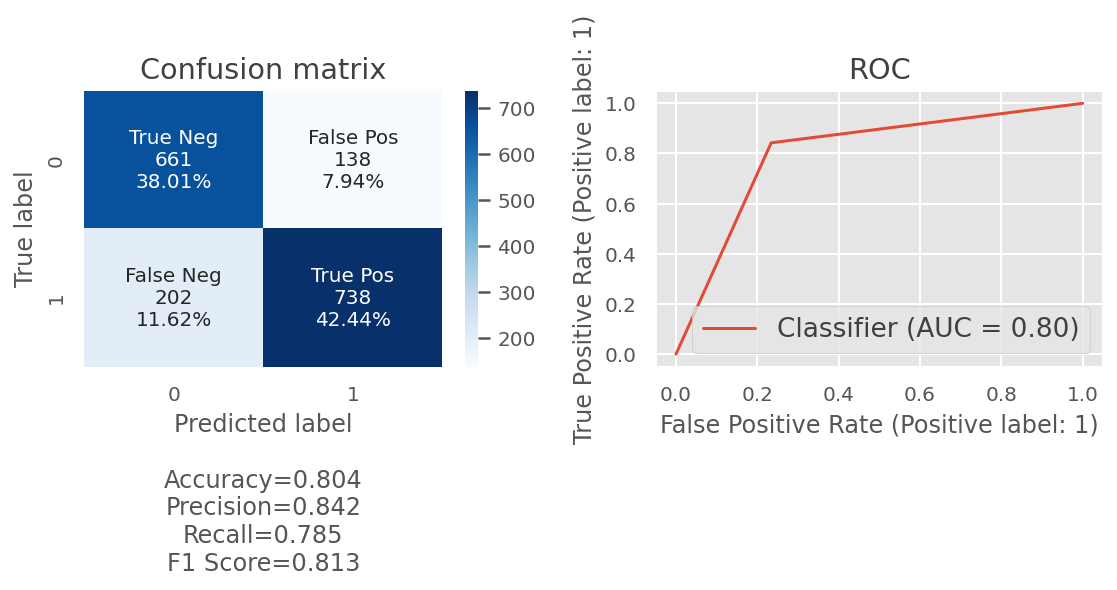

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       863
           1       0.79      0.84      0.81       876

    accuracy                           0.80      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.81      0.80      0.80      1739



### Model `LightGBM`

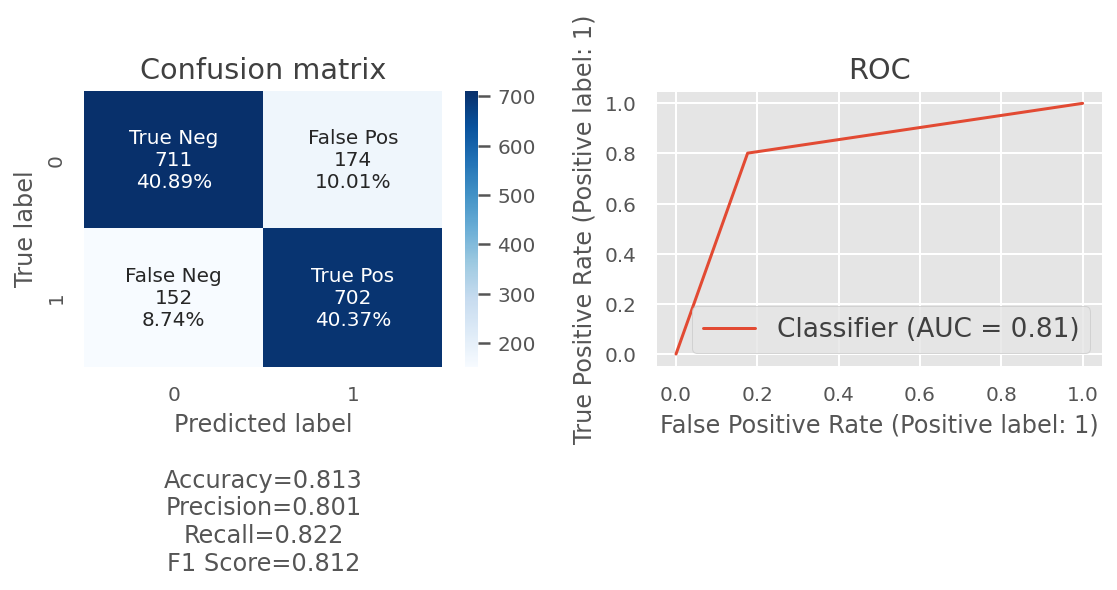

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       863
           1       0.82      0.80      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `XGBoost`

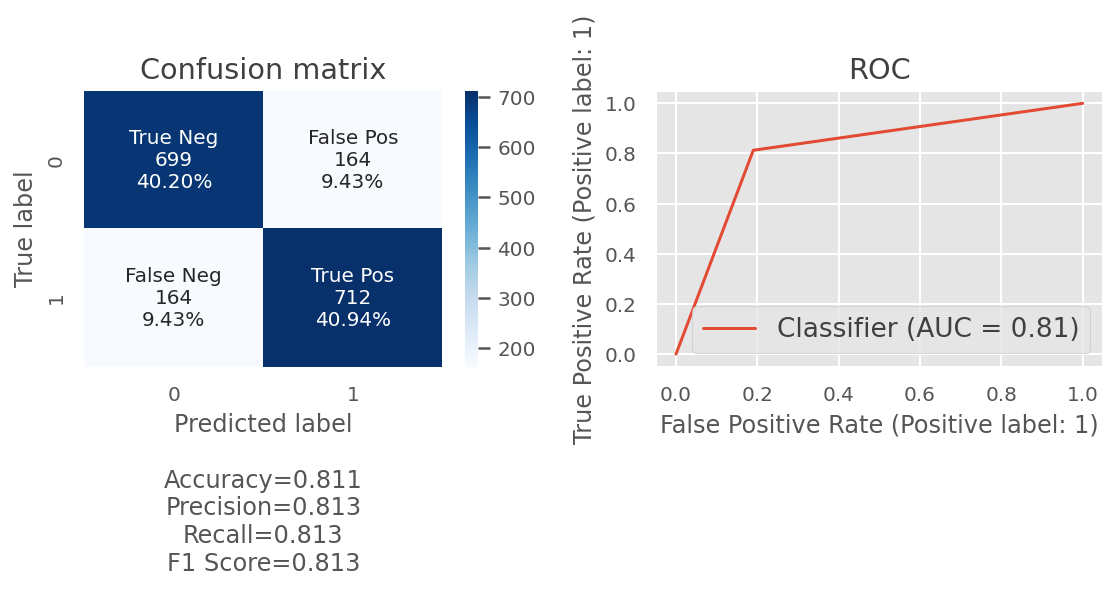

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       863
           1       0.81      0.81      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



### Model `KNN`

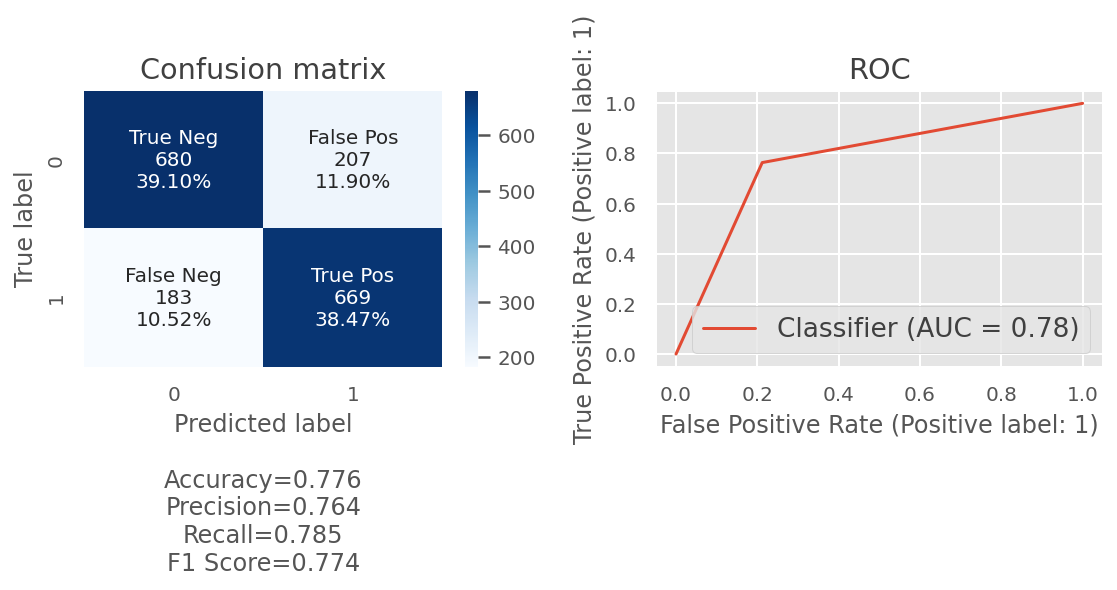

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       863
           1       0.79      0.76      0.77       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [219]:
from IPython.display import display, Markdown, Latex
for name, cls in classifiers.items():
    display(Markdown('### Model `{}`'.format(name)))
    
    models[name] = model = make_pipeline(
        preprocessor,
        classifiers[name]
    ).fit(X_train.copy(), y_train)

    y_pred = model.predict(X_val.copy())
    plot_model_result(y_pred, y_val)
    
    X_trans = preprocessor.fit_transform(X_train.copy())
    scores.loc[name] = cross_val_score(
        classifiers[name], 
        X_trans.copy(), y_train, cv=NUM_FOLDS)

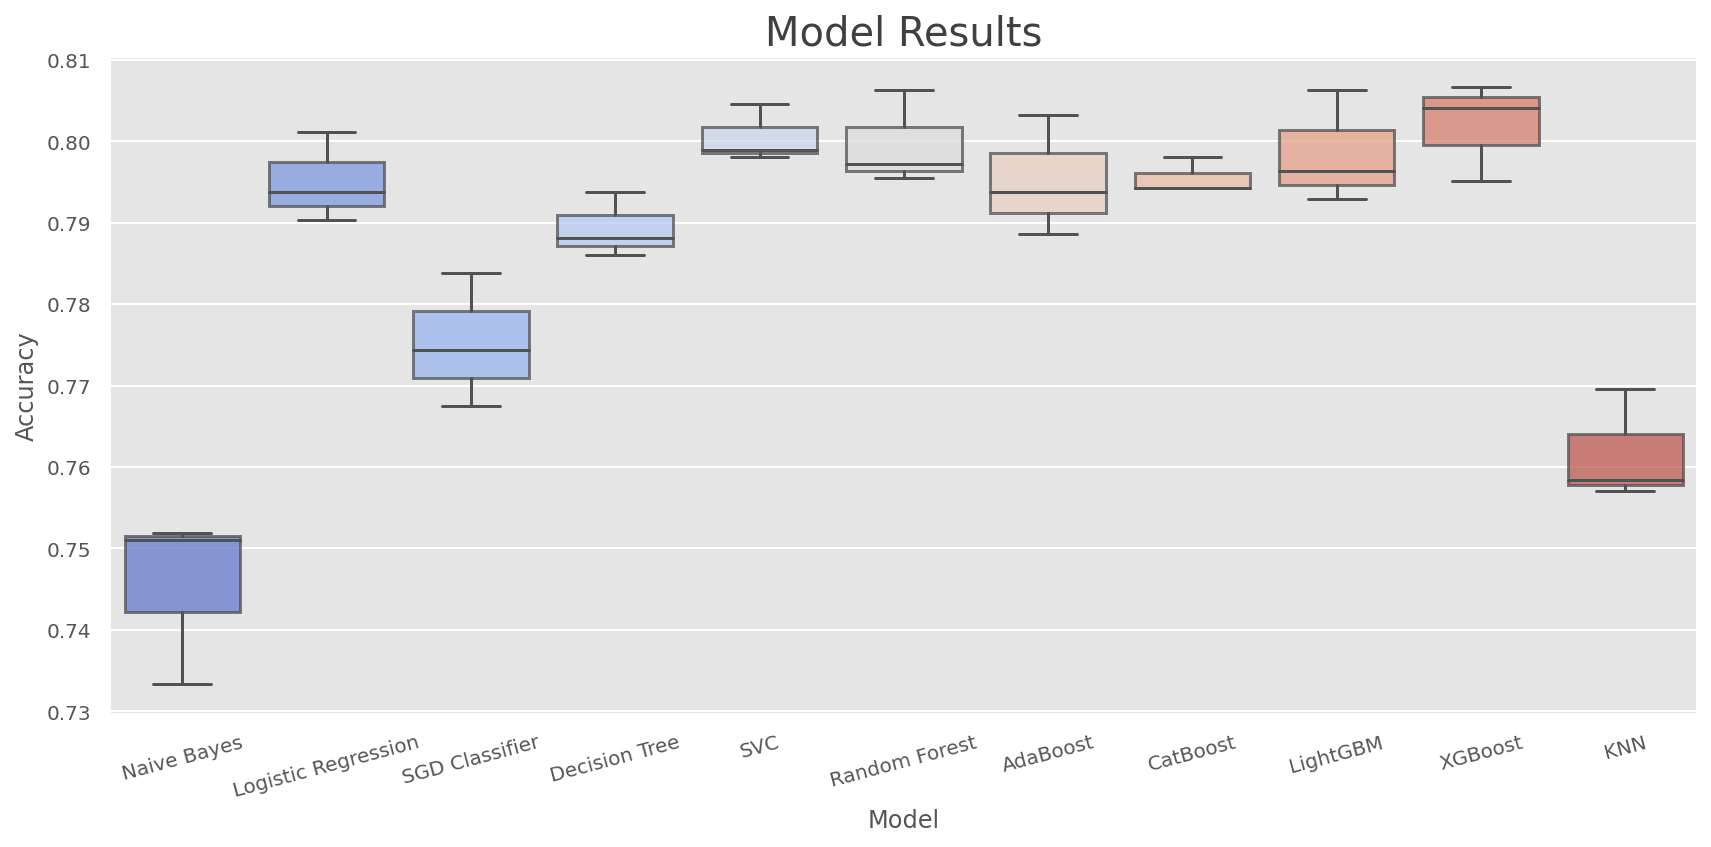

In [235]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))    
sns.boxplot(
    data=scores.T, 
    ax=ax,
    boxprops=dict(alpha=.75),
    palette='coolwarm'
    )

ax.set_title(f'Model Results',fontsize=20)
ax.set_xlabel('Model',fontsize=12)
ax.set_ylabel('Accuracy',fontsize=12)
ax.tick_params(labelsize = 10,axis = 'both')
plt.xticks(rotation = 15)




plt.tight_layout()
plt.show()
fig.tight_layout()
fig.savefig('Model Results.png')

In [236]:
pd.DataFrame({
    'Model': scores.index,
    'Score': scores.mean(axis=1).round(4),
    'Std': scores.std(axis=1).round(4)
}).set_index('Model').sort_values(by='Score', ascending=False)

Score     Std
Model                              
XGBoost              0.8020  0.0061
SVC                  0.8005  0.0035
Random Forest        0.7997  0.0058
LightGBM             0.7985  0.0069
CatBoost             0.7955  0.0022
AdaBoost             0.7952  0.0074
Logistic Regression  0.7951  0.0055
Decision Tree        0.7893  0.0040
SGD Classifier       0.7752  0.0082
KNN                  0.7617  0.0069
Naive Bayes          0.7455  0.0105

In [241]:


LR_grid = {'classifier__penalty': ['l1','l2'],
           'classifier__C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'classifier__max_iter': [50, 100, 150]}

SGD_grid = {'classifier__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
            'classifier__penalty': ['l1', 'l2', 'elasticnet'],
            'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
            'classifier__class_weight': [{1: 0.5, 0: 0.5},{1: 0.4, 0: 0.6},{1: 0.6, 0: 0.4},{1: 0.7, 0: 0.3}],
            'classifier__eta0': [1, 10, 100]}

DT_grid = {'classifier__max_depth': [2, 3, 5, 10, 20],
            'classifier__min_samples_leaf': [5, 10, 20, 50, 100],
            'classifier__criterion': ["gini", "entropy"]}

SVC_grid = {'classifier__C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']}

RF_grid = {'classifier__n_estimators': [50, 100, 150, 200, 250, 300],
           'classifier__max_depth': [4, 6, 8, 10, 12]}

ADA_grid = {
    'classifier__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
    'classifier__learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'classifier__algorithm': ['SAMME', 'SAMME.R']
    }

CAT_grid =  {
   # 'classifier__n_estimators':[100, 200, 300],
    "classifier__learning_rate": np.linspace(0,0.2,5),
    "classifier__max_depth": [4,5,6,7,8,9, 10]
    }
LGBM_grid = {
    'classifier__n_estimators': [400, 700, 1000],
    'classifier__colsample_bytree': [0.7, 0.8],
    'classifier__max_depth': [15,20,25],
    'classifier__num_leaves': [50, 100, 200],
    'classifier__reg_alpha': [1.1, 1.2, 1.3],
    'classifier__reg_lambda': [1.1, 1.2, 1.3],
    'classifier__min_split_gain': [0.3, 0.4],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__subsample_freq': [20]
}

KNN_grid = {'classifier__n_neighbors': list(range(1,31)),
           'classifier__weights': ['uniform','distance'],
            'classifier__p': [1,2]
            }

XGB_grid = {
    'classifier__n_estimators': [400, 700, 1000],
    'classifier__colsample_bytree': [0.7, 0.8],
    'classifier__max_depth': [15,20,25],
    'classifier__reg_alpha': [1.1, 1.2, 1.3],
    'classifier__reg_lambda': [1.1, 1.2, 1.3],
    'classifier__subsample': [0.7, 0.8, 0.9]
}

NB_grid={"classifier__var_smoothing": [1e-10, 1e-9, 1e-8]
        }
grid = {
    'Naive Bayes': NB_grid,
    'Logistic Regression': LR_grid,
    'SGD Classifier':SGD_grid,
    'Decision Tree': DT_grid,
    "SVC" : SVC_grid,
    'Random Forest': RF_grid,
    'AdaBoost': ADA_grid,
    'CatBoost': CAT_grid,
    'LightGBM': LGBM_grid,
    'XGBoost': XGB_grid,
    'KNN':KNN_grid
}
      





In [242]:
classifier_training_scores = {}
df_best_scores = pd.DataFrame()
i = 1



for key, classifier in tqdm(classifiers.items()):
    
    clf_pipeline = make_full_pipeline( 
                                      classifier=classifier)
    clf = GridSearchCV(clf_pipeline, param_grid=grid[key], cv=2, n_jobs=-1, scoring=SCORING)
    clf.fit(X, y)

    print("Model used: ", key)
    print(clf.best_params_)
    print(clf.best_score_)
    print()
    
    classifier_training_scores[f"{i}"] = {
                "classifier" : key,
                "best_params" : clf.best_params_,
                "best_score" : clf.best_score_,
    }
    
    pd.DataFrame(clf.cv_results_).to_csv(f"{OUTPUT_PATH}cv_results_{key}.csv", index=False)
    
    df_current_classifier = pd.DataFrame(clf.cv_results_).sort_values(by=["rank_test_score"], ascending=True)[:10]
    df_current_classifier["classifier"]=key
    
    df_best_scores = df_best_scores.append(df_current_classifier)
    df_best_scores.reset_index(inplace=True, drop=True)
    
    i = i + 1

  0%|          | 0/11 [00:00<?, ?it/s]

Model used:  Naive Bayes
{'classifier__var_smoothing': 1e-08}
0.739790076911668

Model used:  Logistic Regression
{'classifier__C': 0.25, 'classifier__max_iter': 150, 'classifier__penalty': 'l1'}
0.7894861609071577

Model used:  SGD Classifier
{'classifier__alpha': 0.001, 'classifier__class_weight': {1: 0.5, 0: 0.5}, 'classifier__eta0': 100, 'classifier__learning_rate': 'optimal', 'classifier__loss': 'log', 'classifier__penalty': 'l1'}
0.7963886631326956

Model used:  Decision Tree
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 5}
0.7928237267059572

Model used:  SVC
{'classifier__C': 1.5, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
0.7753356674353493

Model used:  Random Forest
{'classifier__max_depth': 10, 'classifier__n_estimators': 100}
0.8014510009547926

Model used:  AdaBoost
{'classifier__algorithm': 'SAMME.R', 'classifier__learning_rate': 1.03, 'classifier__n_estimators': 12}
0.7912127590942692

Model used:  CatBo

https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

In [250]:
df_scores = pd.DataFrame.from_dict(classifier_training_scores).transpose()
df_scores = df_scores.sort_values(by=["best_score"],ascending = False)
df_scores

classifier                                        best_params  \
9              LightGBM  {'classifier__colsample_bytree': 0.8, 'classif...   
6         Random Forest  {'classifier__max_depth': 10, 'classifier__n_e...   
8              CatBoost  {'classifier__learning_rate': 0.2, 'classifier...   
3        SGD Classifier  {'classifier__alpha': 0.001, 'classifier__clas...   
4         Decision Tree  {'classifier__criterion': 'entropy', 'classifi...   
10              XGBoost  {'classifier__colsample_bytree': 0.8, 'classif...   
7              AdaBoost  {'classifier__algorithm': 'SAMME.R', 'classifi...   
2   Logistic Regression  {'classifier__C': 0.25, 'classifier__max_iter'...   
5                   SVC  {'classifier__C': 1.5, 'classifier__gamma': 's...   
11                  KNN  {'classifier__n_neighbors': 29, 'classifier__p...   
1           Naive Bayes               {'classifier__var_smoothing': 1e-08}   

   best_score  
9    0.806627  
6    0.801451  
8    0.796505  
3    0.796389  
4    0.792824  
10   0.791213  
7    0.791213  
2    0.789486  
5    0.775336  
11   0.762337  
1     0.73979

In [ ]:
df_scores = df_scores.sort_values(by=["best_score"])

In [254]:
scores.T

Naive Bayes  Logistic Regression  SGD Classifier  Decision Tree       SVC  \
1     0.751941             0.793788        0.774374       0.786022  0.798102   
2     0.751079             0.790336        0.783865       0.788179  0.798965   
3     0.733391             0.801122        0.767472       0.793788  0.804573   

   Random Forest  AdaBoost  CatBoost  LightGBM   XGBoost       KNN  
1       0.797239  0.793788  0.794219  0.806299  0.806730  0.758412  
2       0.795513  0.788611  0.794219  0.792925  0.795082  0.757118  
3       0.806299  0.803279  0.798102  0.796376  0.804142  0.769629

In [256]:
df_scores

classifier                                        best_params  \
9              LightGBM  {'classifier__colsample_bytree': 0.8, 'classif...   
6         Random Forest  {'classifier__max_depth': 10, 'classifier__n_e...   
8              CatBoost  {'classifier__learning_rate': 0.2, 'classifier...   
3        SGD Classifier  {'classifier__alpha': 0.001, 'classifier__clas...   
4         Decision Tree  {'classifier__criterion': 'entropy', 'classifi...   
10              XGBoost  {'classifier__colsample_bytree': 0.8, 'classif...   
7              AdaBoost  {'classifier__algorithm': 'SAMME.R', 'classifi...   
2   Logistic Regression  {'classifier__C': 0.25, 'classifier__max_iter'...   
5                   SVC  {'classifier__C': 1.5, 'classifier__gamma': 's...   
11                  KNN  {'classifier__n_neighbors': 29, 'classifier__p...   
1           Naive Bayes               {'classifier__var_smoothing': 1e-08}   

   best_score  
9    0.806627  
6    0.801451  
8    0.796505  
3    0.796389  
4    0.792824  
10   0.791213  
7    0.791213  
2    0.789486  
5    0.775336  
11   0.762337  
1     0.73979

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))    
sns.boxplot(
    data=scores.T, 
    ax=ax,
    boxprops=dict(alpha=.75),
    palette='coolwarm'
    )

ax.set_title(f'Model Results',fontsize=20)
ax.set_xlabel('Model',fontsize=12)
ax.set_ylabel('Accuracy',fontsize=12)
ax.tick_params(labelsize = 10,axis = 'both')
plt.xticks(rotation = 15)




plt.tight_layout()
plt.show()
fig.tight_layout()
fig.savefig('Model Results.png')

In [258]:
df_scores

classifier                                        best_params  \
9              LightGBM  {'classifier__colsample_bytree': 0.8, 'classif...   
6         Random Forest  {'classifier__max_depth': 10, 'classifier__n_e...   
8              CatBoost  {'classifier__learning_rate': 0.2, 'classifier...   
3        SGD Classifier  {'classifier__alpha': 0.001, 'classifier__clas...   
4         Decision Tree  {'classifier__criterion': 'entropy', 'classifi...   
10              XGBoost  {'classifier__colsample_bytree': 0.8, 'classif...   
7              AdaBoost  {'classifier__algorithm': 'SAMME.R', 'classifi...   
2   Logistic Regression  {'classifier__C': 0.25, 'classifier__max_iter'...   
5                   SVC  {'classifier__C': 1.5, 'classifier__gamma': 's...   
11                  KNN  {'classifier__n_neighbors': 29, 'classifier__p...   
1           Naive Bayes               {'classifier__var_smoothing': 1e-08}   

   best_score  
9    0.806627  
6    0.801451  
8    0.796505  
3    0.796389  
4    0.792824  
10   0.791213  
7    0.791213  
2    0.789486  
5    0.775336  
11   0.762337  
1     0.73979

In [264]:
df_best_scores

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.026484      0.000448         0.014380        0.000008   
1         0.025084      0.000147         0.014135        0.000267   
2         0.025437      0.000071         0.014002        0.000001   
3         0.148796      0.015275         0.021249        0.000370   
4         0.124519      0.002920         0.022188        0.000903   
..             ...           ...              ...             ...   
98        0.096297      0.022043         1.504116        0.030089   
99        0.070367      0.002364         1.250097        0.135170   
100       0.060228      0.014667         1.065792        0.146089   
101       0.113373      0.031129         1.389314        0.013174   
102       0.081045      0.005025         1.700981        0.062381   

    param_classifier__var_smoothing  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               NaN   
4                               NaN   
..                              ...   
98                              NaN   
99                              NaN   
100                             NaN   
101                             NaN   
102                             NaN   

                                                params  split0_test_score  \
0                 {'classifier__var_smoothing': 1e-08}           0.744651   
1                 {'classifier__var_smoothing': 1e-09}           0.721187   
2                 {'classifier__var_smoothing': 1e-10}           0.682080   
3    {'classifier__C': 0.25, 'classifier__max_iter'...           0.786289   
4    {'classifier__C': 0.25, 'classifier__max_iter'...           0.786519   
..                                                 ...                ...   
98   {'classifier__n_neighbors': 27, 'classifier__p...           0.765355   
99   {'classifier__n_neighbors': 27, 'classifier__p...           0.764665   
100  {'classifier__n_neighbors': 28, 'classifier__p...           0.765355   
101  {'classifier__n_neighbors': 26, 'classifier__p...           0.766506   
102  {'classifier__n_neighbors': 25, 'classifier__p...           0.762825   

     split1_test_score  mean_test_score  std_test_score  ...  \
0             0.734929         0.739790        0.004861  ...   
1             0.734929         0.728058        0.006871  ...   
2             0.734929         0.708504        0.026425  ...   
3             0.792683         0.789486        0.003197  ...   
4             0.792453         0.789486        0.002967  ...   
..                 ...              ...             ...  ...   
98            0.755637         0.760496        0.004859  ...   
99            0.755177         0.759921        0.004744  ...   
100           0.754487         0.759921        0.005434  ...   
101           0.749425         0.757965        0.008540  ...   
102           0.752416         0.757620        0.005204  ...   

     param_classifier__colsample_bytree param_classifier__min_split_gain  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   NaN                              NaN   
4                                   NaN                              NaN   
..                                  ...                              ...   
98                                  NaN                              NaN   
99                                  NaN                              NaN   
100                                 NaN                              NaN   
101                                 NaN                              NaN   
102                                 NaN                              NaN   

    param_classifier__num_leaves param_classifier__reg_alpha  \
0                            NaN    

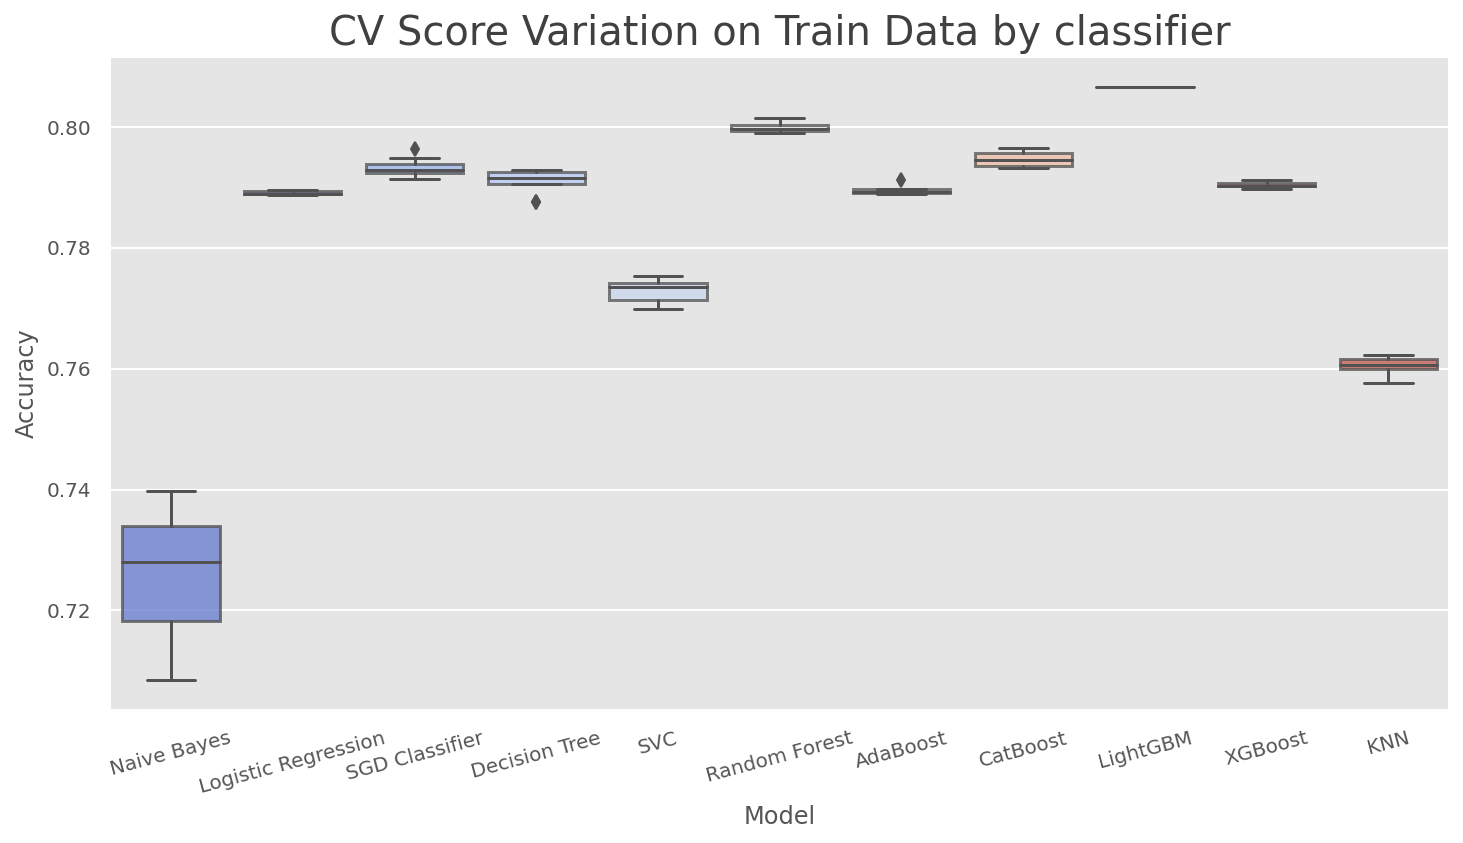

<Figure size 1296x432 with 0 Axes>

In [268]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))

# add the plot
# sns.barplot(x="classifier", y="best_score", data=df_best_scores.groupby("classifier"), capsize=0.2, ax=ax)
sns.boxplot(x="classifier", y="mean_test_score", data=df_best_scores,  ax=ax, boxprops=dict(alpha=.75),palette='coolwarm')

# add the annotation
# ax.box_label(ax.containers[-1], label_type="center")

# ax.set(ylabel="Cross validation score on training data")
ax.set_title("CV Score Variation on Train Data by classifier",fontsize=20)
ax.set_xlabel('Model',fontsize=12)
ax.set_ylabel('Accuracy',fontsize=12)
ax.tick_params(labelsize = 10,axis = 'both')
plt.xticks(rotation = 15)
plt.show()

plt.tight_layout()
plt.show()
fig.tight_layout()
fig.savefig('Model Results.png')